In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from scipy.stats import zscore
import statsmodels.formula.api as sm
from scipy.stats import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [3]:
from xgboost import XGBClassifier

In [4]:
data=pd.read_excel('Election_Data.xlsx',sheet_name='Sheet1')

In [5]:
data.shape

(18, 1)

In [6]:
data

,**Data Dictionary**
0,NaN
1,1. vote: Party choice: Conservative or Labour
2,NaN
3,2. age: in years
4,NaN
5,3. economic.cond.national: Assessment of curre...
6,NaN
7,4. economic.cond.household: Assessment of curr...
8,NaN
9,"5. Blair: Assessment of the Labour leader, 1 t..."


In [7]:
ele_df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [8]:
ele_df.shape

(1525, 10)

In [9]:
ele_df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [10]:
#we will remove the column 'Unnamed' as it will not useful as such
ele_df=ele_df.drop('Unnamed: 0',axis=1)

In [11]:
ele_df.shape

(1525, 9)

In [12]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [13]:
ele_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# There are no null values present in the features
ele_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
# lets check for the duplicate values
ele_df.duplicated().sum()

8

Inference
The column “Unnamed : 0” is removed from the dataset before proceeding further as its insignificant for the analysis.
There are 1525 rows and 9 columns
Numerical Columns : age, economical_cond_national, economical_cond_household , Blair, Hague, Europe and political_knowledge.
Non-Numerical Columns : vote and gender.
There are no null values 

Vote and age variable have 2 unique values
vote : Conservative and Labour
        Labour count is 1036 which is more than conservative count
gender : Male and Female
Female voters are more than male voters
age is continuous variable
minimum age of voters is 24
maximum age of voters is 93
Average age of voters is 54 
maximum Assessment of current national economic conditions is 5
Average Assessment of current household economic conditions is 3
minimum Assessment of the Labour leader is 1
Hague: average Assessment of the Conservative leader is 2.7 where as Blair: average Assessment of the Labour leader is 3.3


In [16]:
# lets check the skewness
ele_df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
age have positive skewness where as other variales have negative skewness
Blair have more skewness

In [17]:
dups = ele_df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [18]:
print('Before',ele_df.shape)
ele_df.drop_duplicates(inplace=True) 
print('After',ele_df.shape)

Before (1525, 9)
After (1517, 9)


There are 8 duplicates in the dataframe which dropped . now there are 1517 rows in the dataframe

In [19]:
for column in ele_df.columns:
    if ele_df[column].dtype == 'object':
        print(column.upper(),': ',ele_df[column].nunique())
        print(ele_df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




vote has 2 unique variables 
Conservative party has 460 voters
Labour party has 1057 voters
gender has 2 unique variables
women voters are more than female voters

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

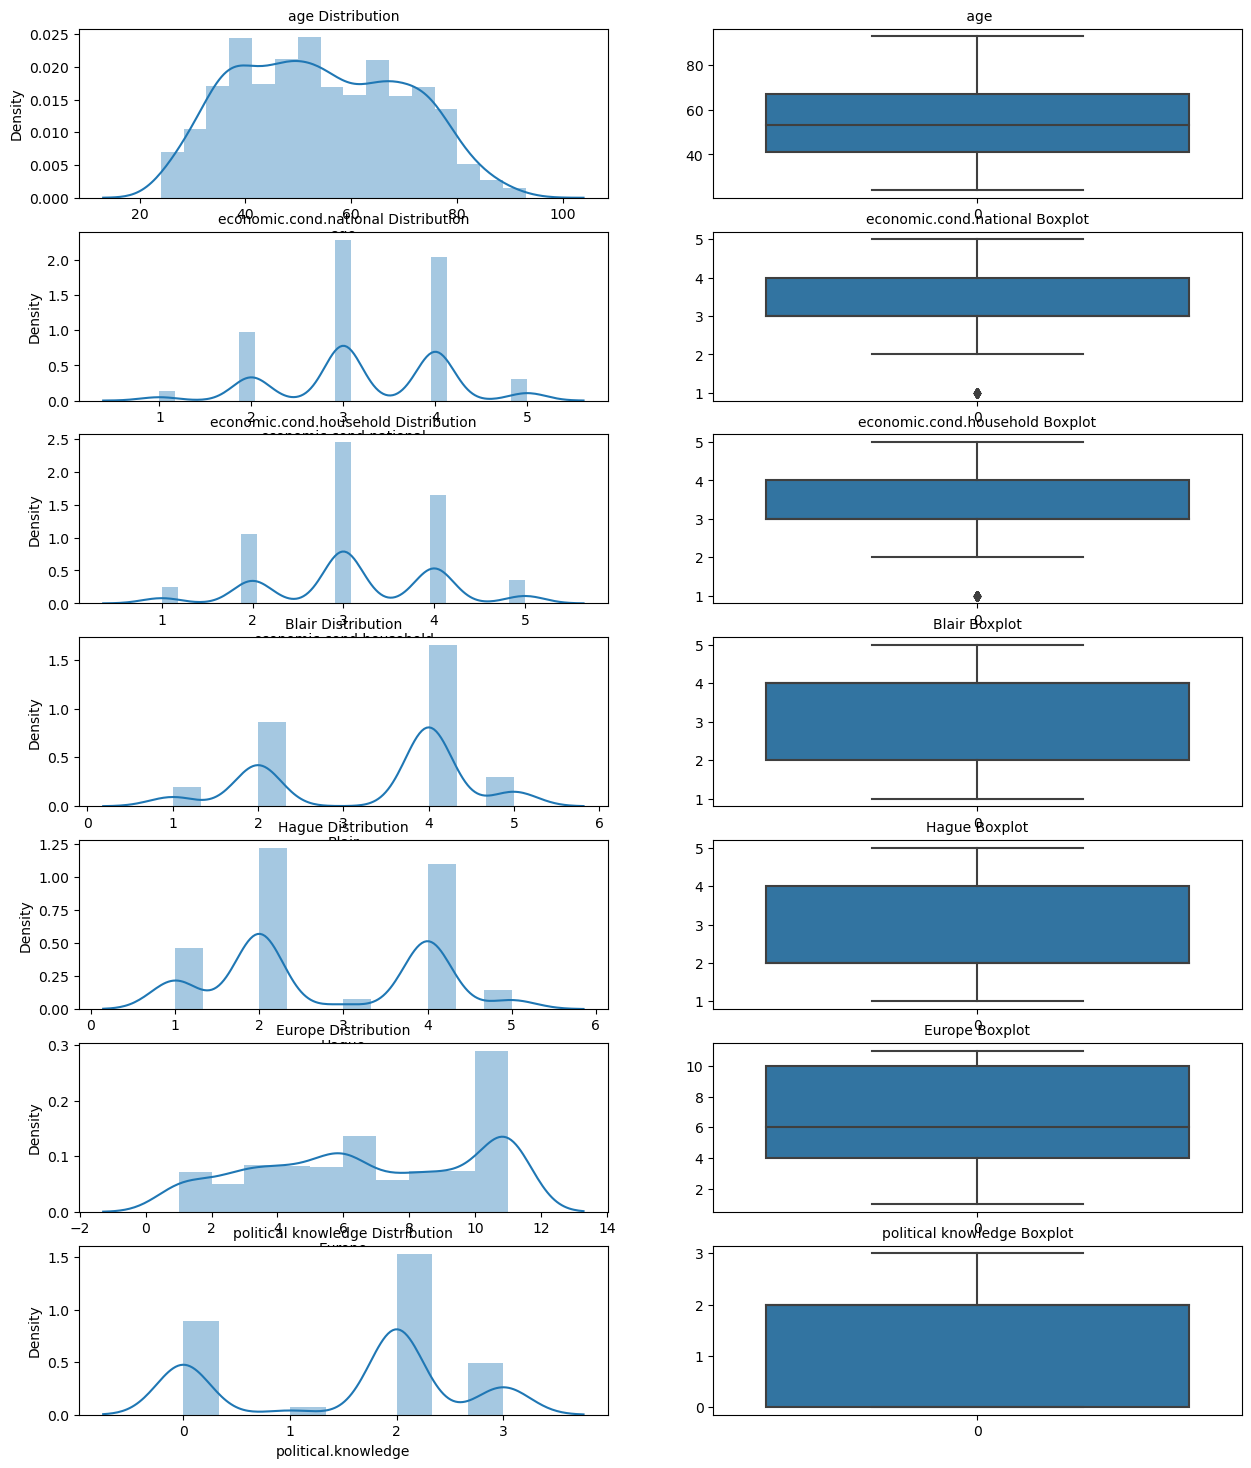

In [20]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,18)

a = sns.distplot(ele_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(ele_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title(" age",fontsize=10)

a = sns.distplot(ele_df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(ele_df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(ele_df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)
a = sns.boxplot(ele_df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(ele_df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(ele_df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)


a = sns.distplot(ele_df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(ele_df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(ele_df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(ele_df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(ele_df['political.knowledge'] , ax=axes[6][0])
a.set_title("political knowledge Distribution",fontsize=10)
a = sns.boxplot(ele_df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political knowledge Boxplot",fontsize=10)

plt.show()

only age is normally distributed others are multimodel skewness seen
only economic.cond.national and economic.cond.household have outliers

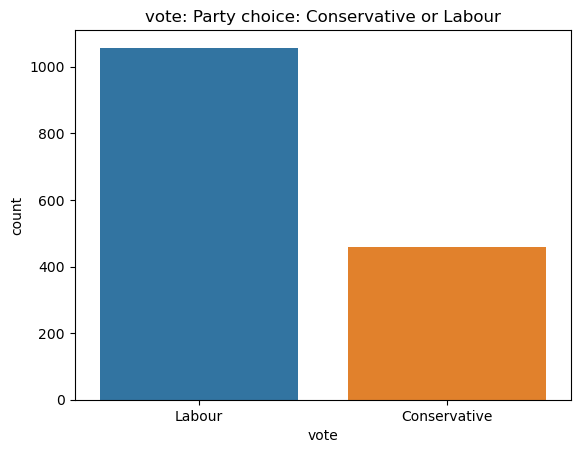

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


In [21]:
sns.countplot(data=ele_df,x='vote')
plt.title("vote: Party choice: Conservative or Labour")
plt.show()
print(ele_df.vote.value_counts(normalize=True))

nearly 69% vote for labour party only 30% vote for conservative party

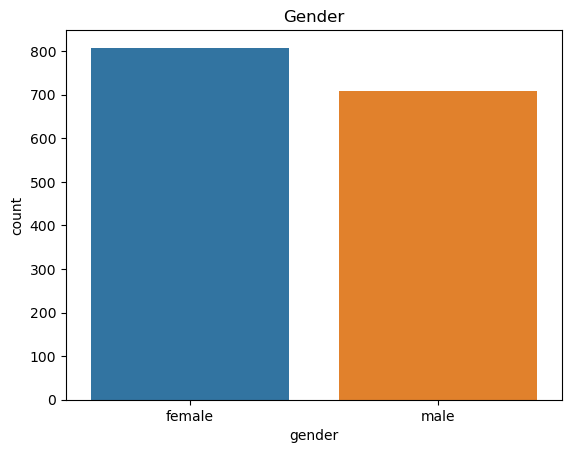

female    0.53263
male      0.46737
Name: gender, dtype: float64


In [22]:
sns.countplot(data=ele_df,x='gender')
plt.title("Gender")
plt.show()
print(ele_df.gender.value_counts(normalize=True))

53% voters are female voters and 46% voters are male voters

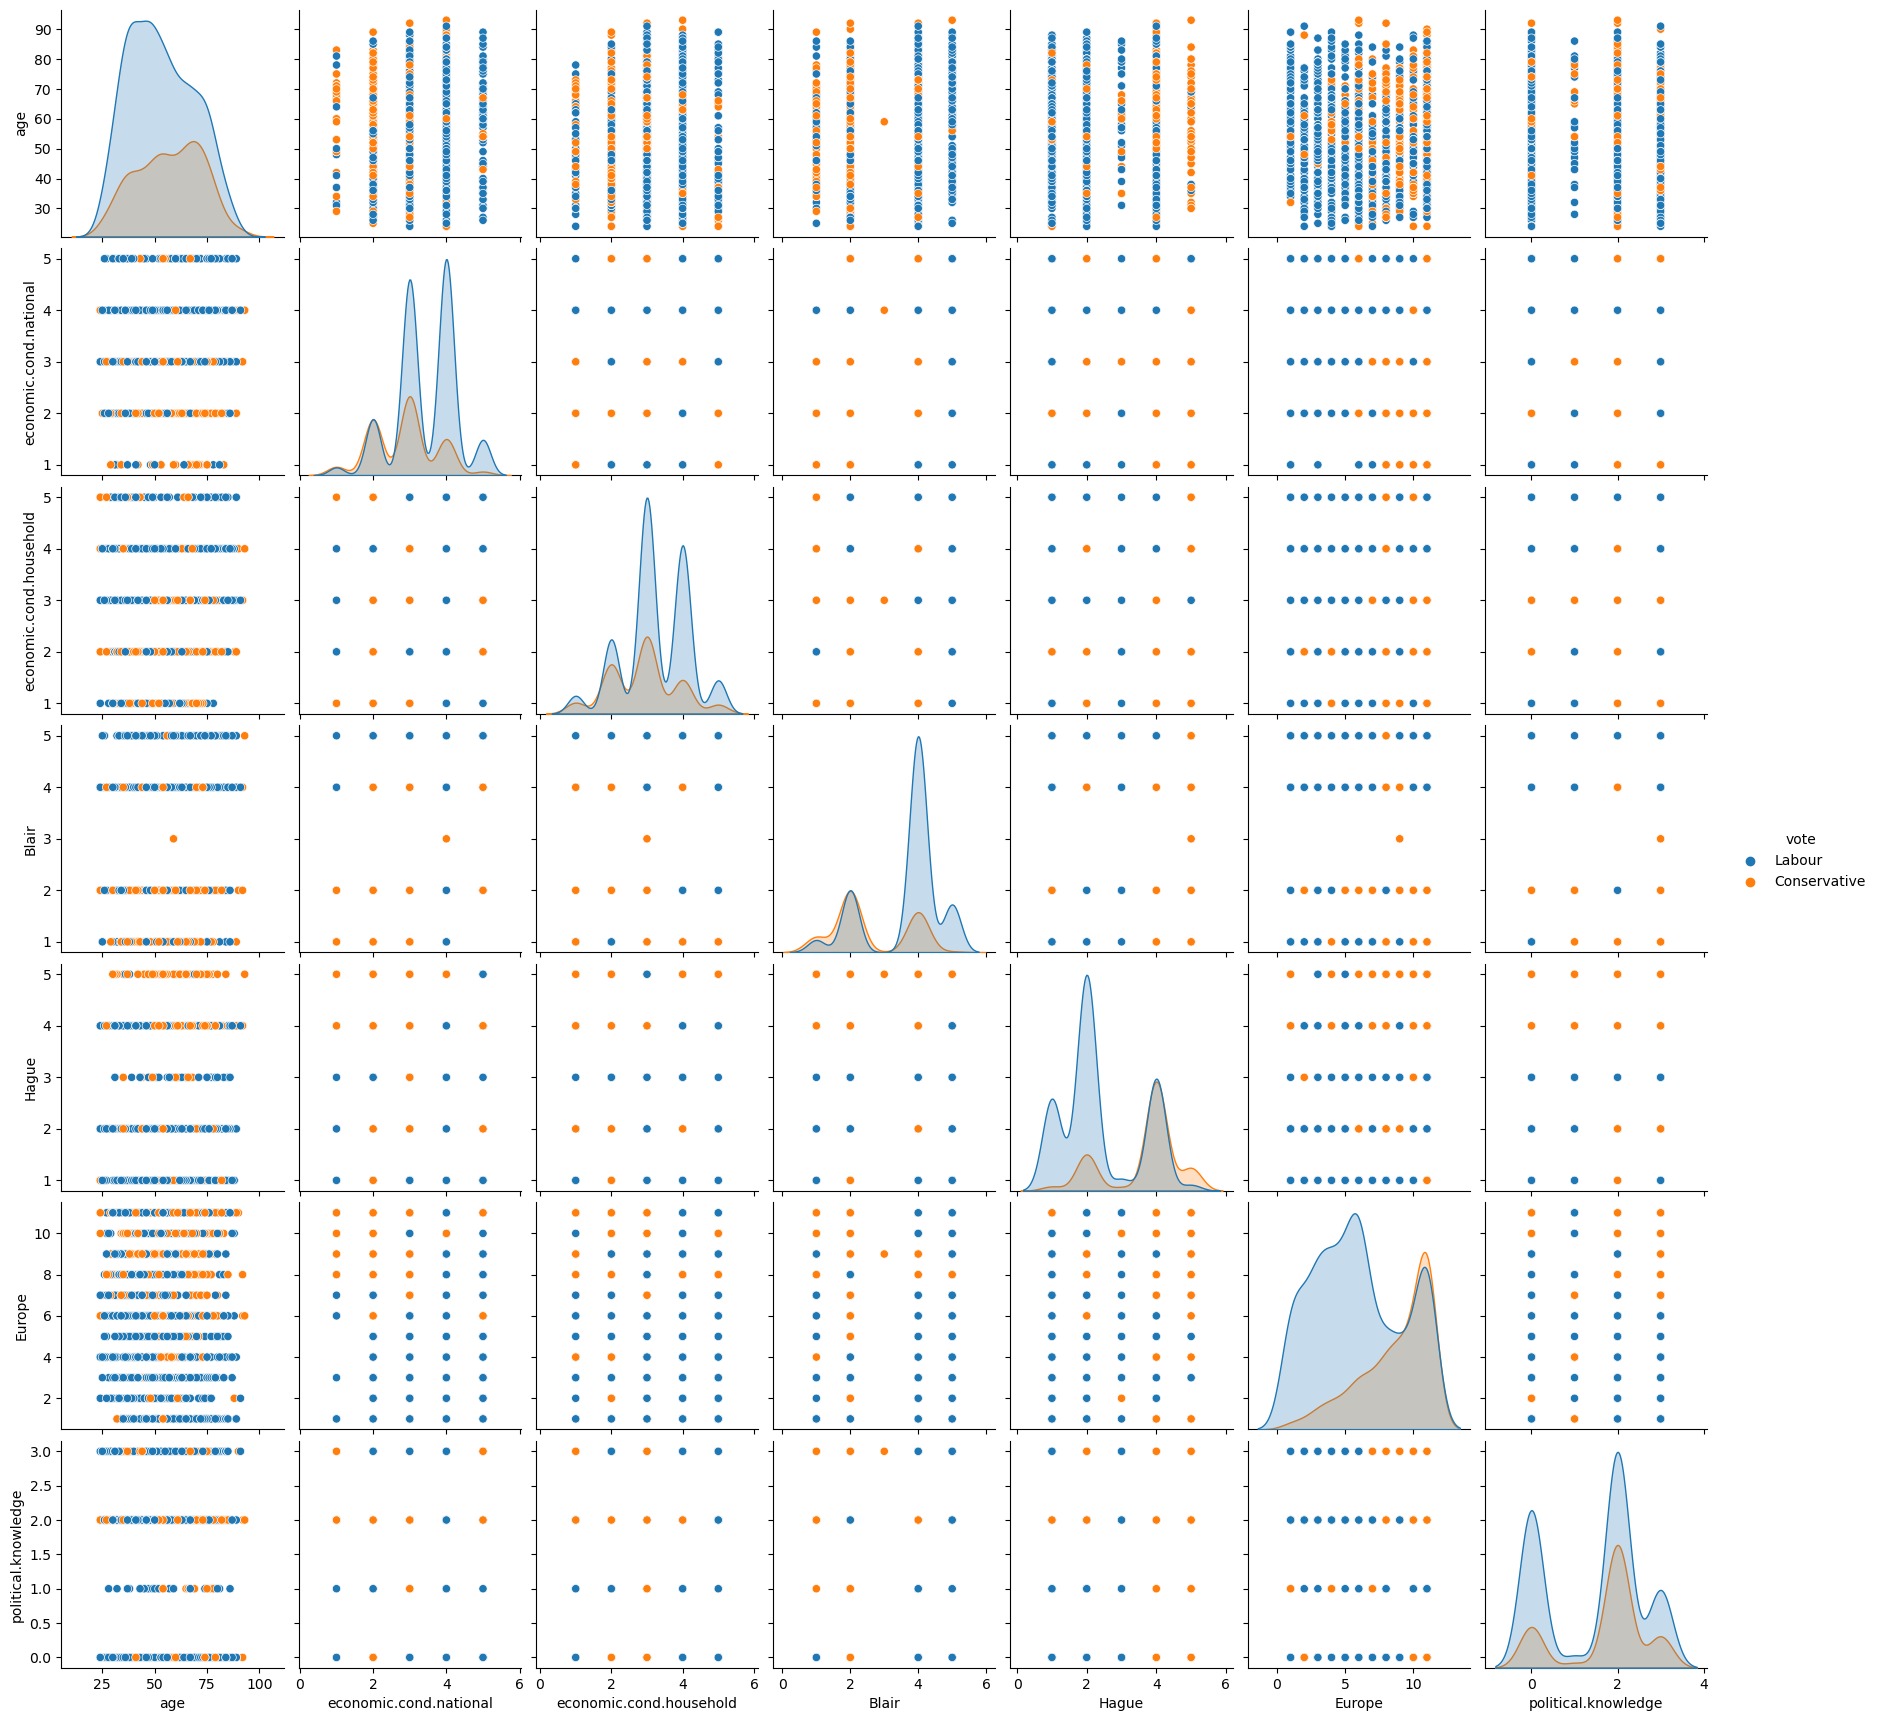

In [23]:
sns.pairplot(ele_df,hue="vote")

There are no linear relationship between variables
Some of the attributes look like they may have an exponential distribution
Conservative party :Knowledge of parties' positions on European integration is unknown

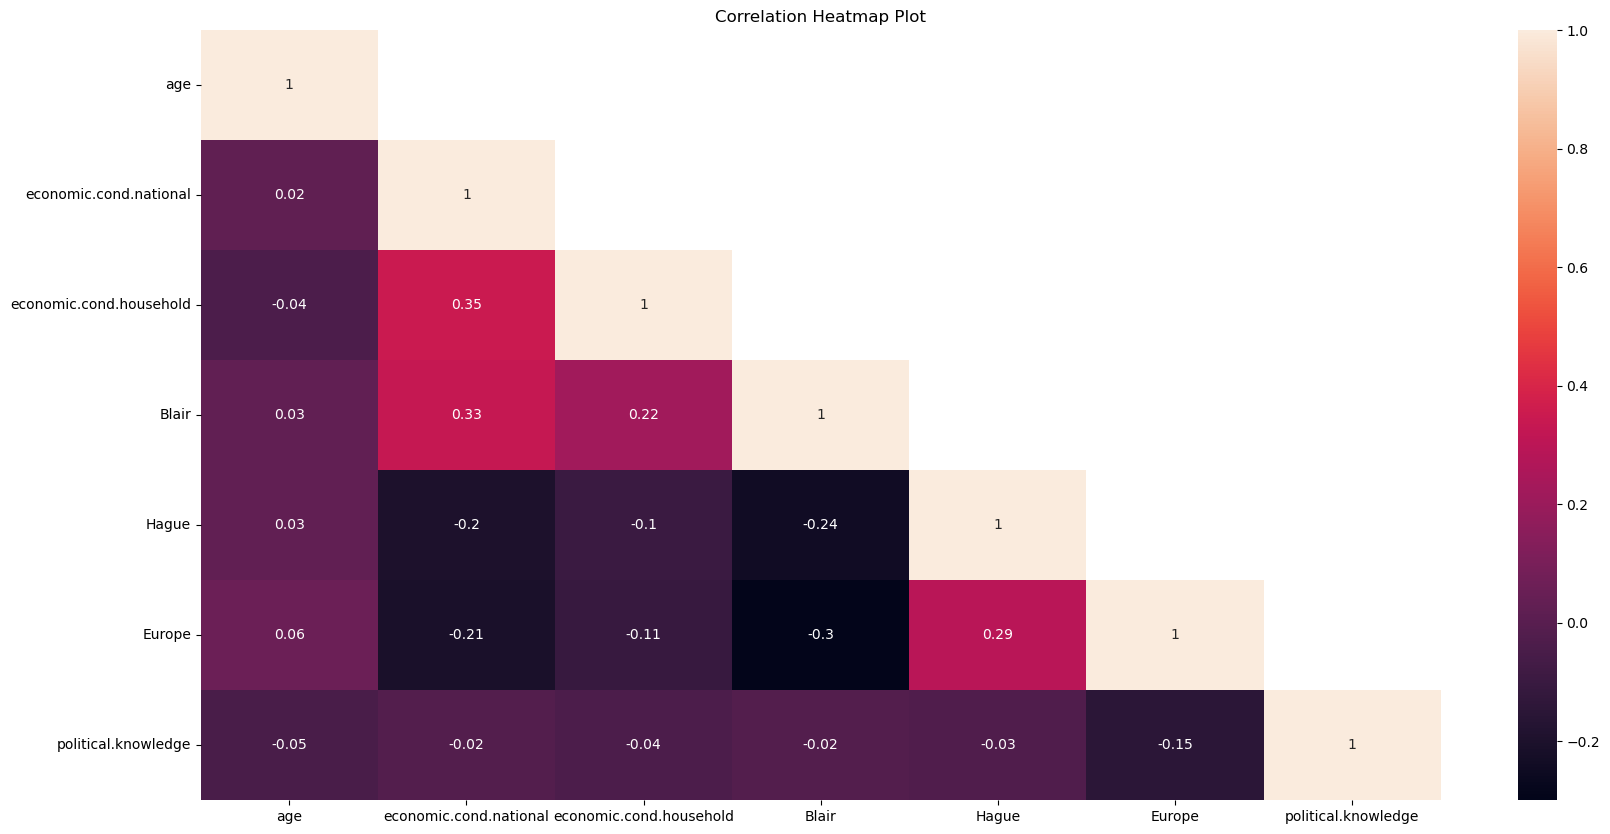

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(round(ele_df.corr(),2), annot=True,mask=np.triu(ele_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

There are very less correlation between the variables
The highest positive correlation is seen between “economic_cond_national” and “economic_cond_household” (35%) with nearly similar results seen from “Blair” and “economic_cond_national” (33%)
The highest negative correlation is seen between “Blair” and “Europe” (30%) with nearly similar results seen from “Blair” and “Hague”(24%)
so , there is less or no chance of multi_collinearity

In [25]:
ele_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

Text(0.5, 1.0, 'vote vs economic.cond.national')

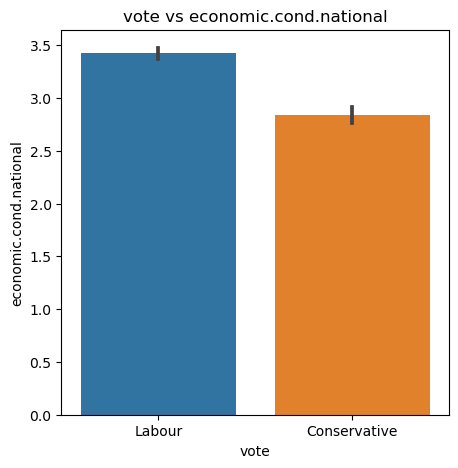

In [26]:
#Bivariate Analysis

plt.figure(figsize=(5,5))
ax = sns.barplot(x='vote', y='economic.cond.national',data=ele_df)
plt.title("vote vs economic.cond.national")

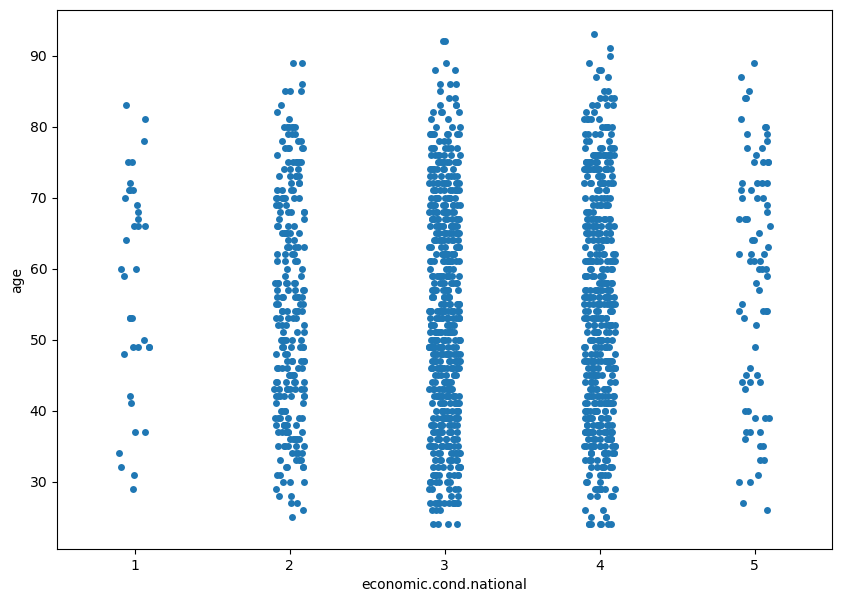

In [27]:
plt.figure(figsize=(10,7))
sns.stripplot(data=ele_df,x="economic.cond.national", y="age", jitter=True) 
plt.show()

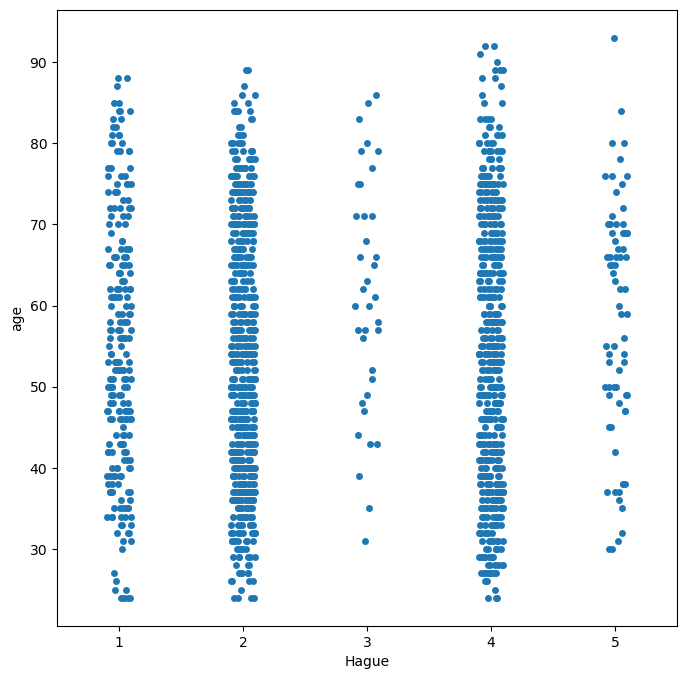

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(data=ele_df,x="Hague", y='age', jitter=True) 
plt.show()

 Above plot is a strip plot with jitter as True that really shows the distribution points on the assessment of the Conservative leader “Hague” on voters of various age.more voters are distributed in 2 and 4 group


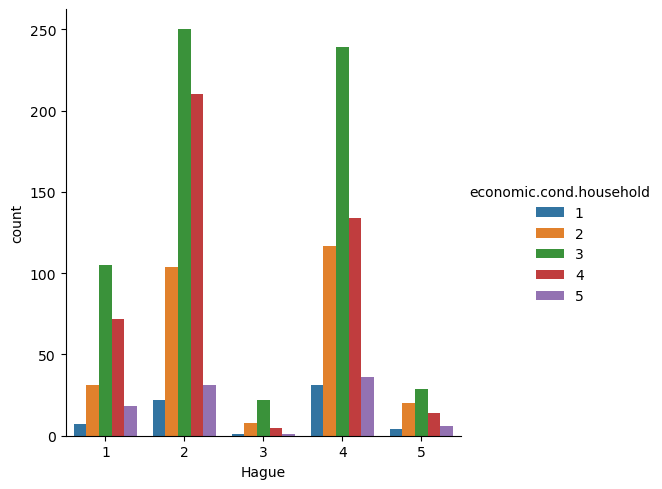

In [29]:
#Catplot Analysis - Hague(count) on economic.cond.household
sns.catplot(x="Hague", kind="count",hue='economic.cond.household',data=ele_df)

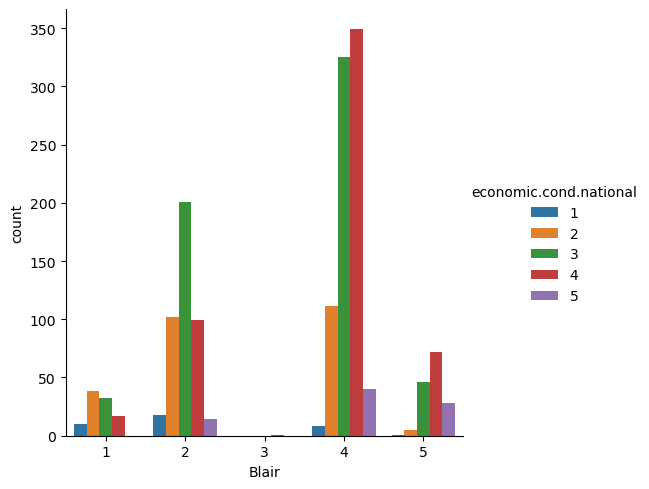

In [30]:
#Catplot Analysis - Blair(count) on economic.cond.national
sns.catplot(x="Blair", kind="count",hue='economic.cond.national',data=ele_df)

Assessment of current national economic conditions with Blair shows no 3 cluster have very less distribution where as no 4 cluster have more distribution


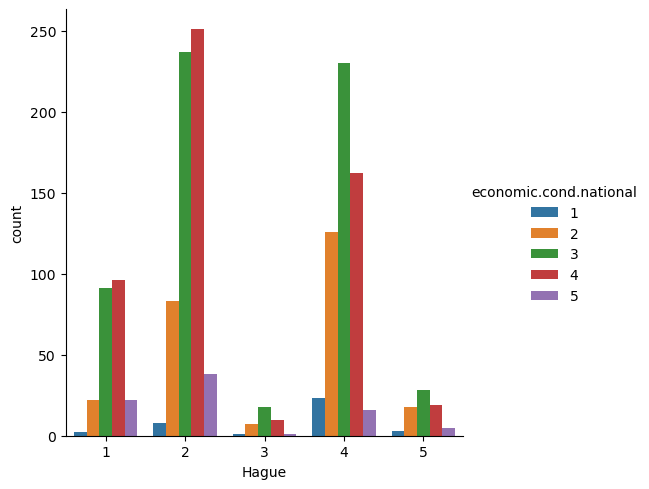

In [31]:
#Catplot Analysis - Hague(count) on economic.cond.national
sns.catplot(x="Hague", kind="count",hue='economic.cond.national',data=ele_df)

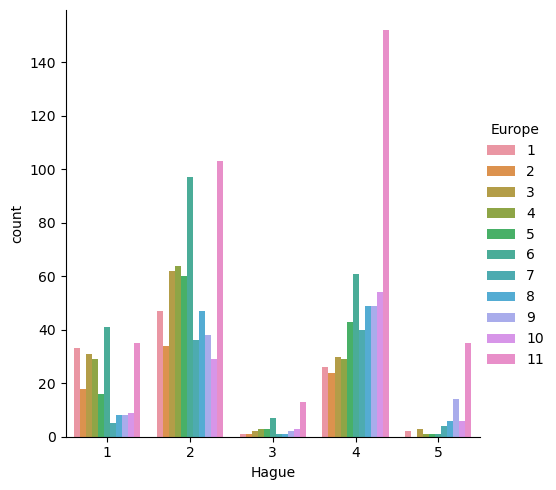

In [32]:
#Catplot Analysis - Hague(count) on Europe
sns.catplot(x="Hague", kind="count",hue='Europe',data=ele_df)

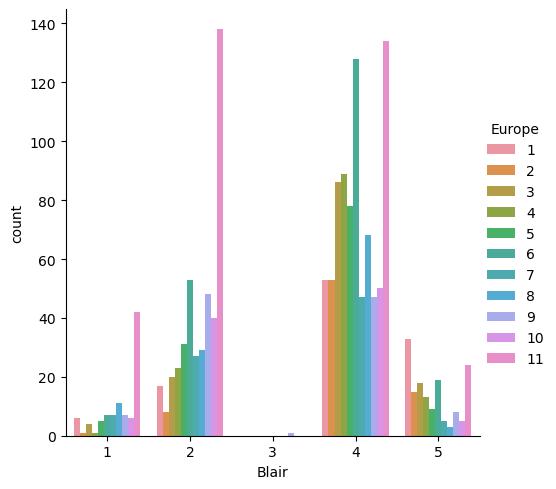

In [33]:
sns.catplot(x="Blair", kind="count",hue='Europe',data=ele_df)

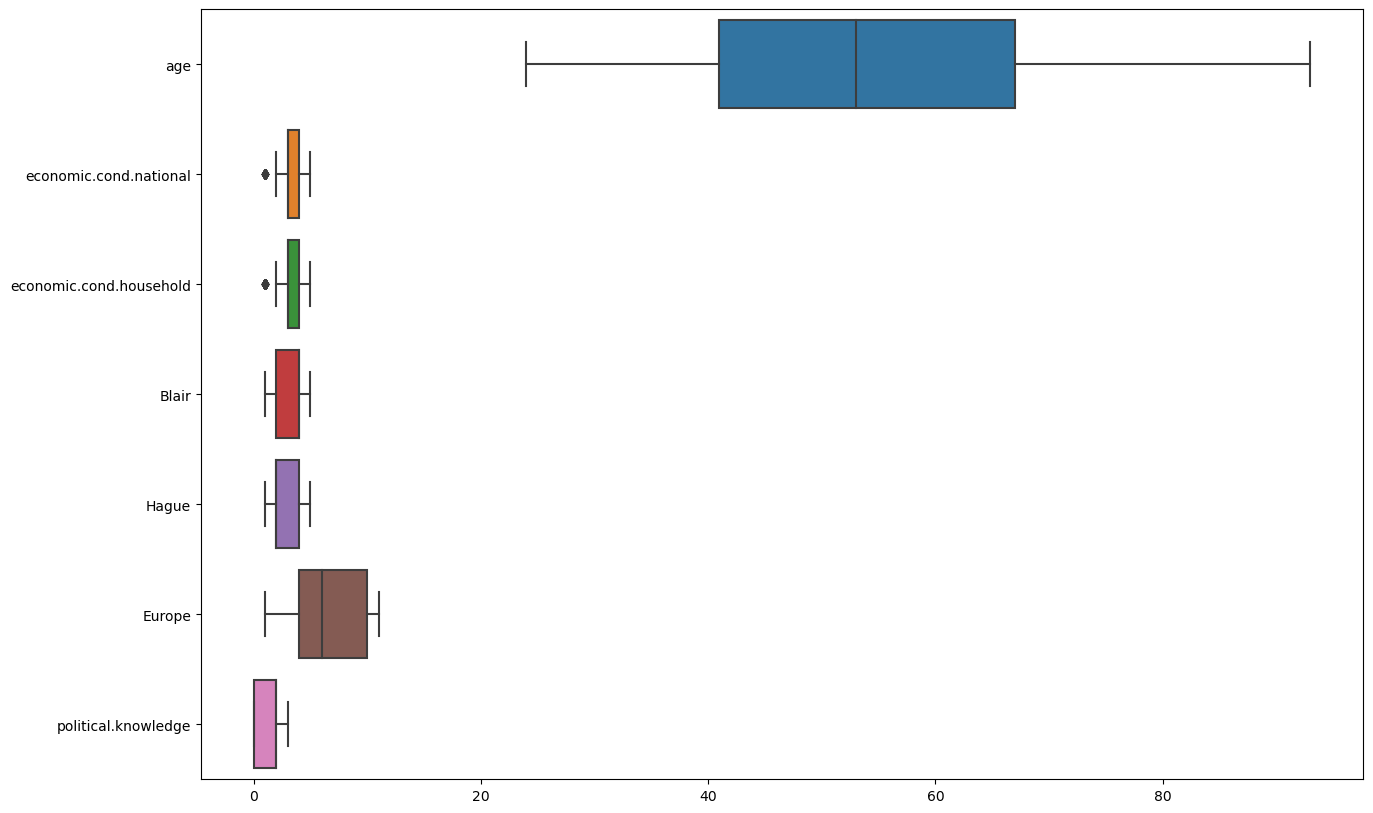

In [34]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=ele_df,orient="h")
plt.show()

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
dtypes=ele_df.dtypes[(ele_df.dtypes!= 'object')].index
for column in ele_df[dtypes].columns:
    lr,ur=remove_outlier(ele_df[column])
    ele_df[column]=np.where(ele_df[column]>ur,ur,ele_df[column])
    ele_df[column]=np.where(ele_df[column]<lr,lr,ele_df[column])

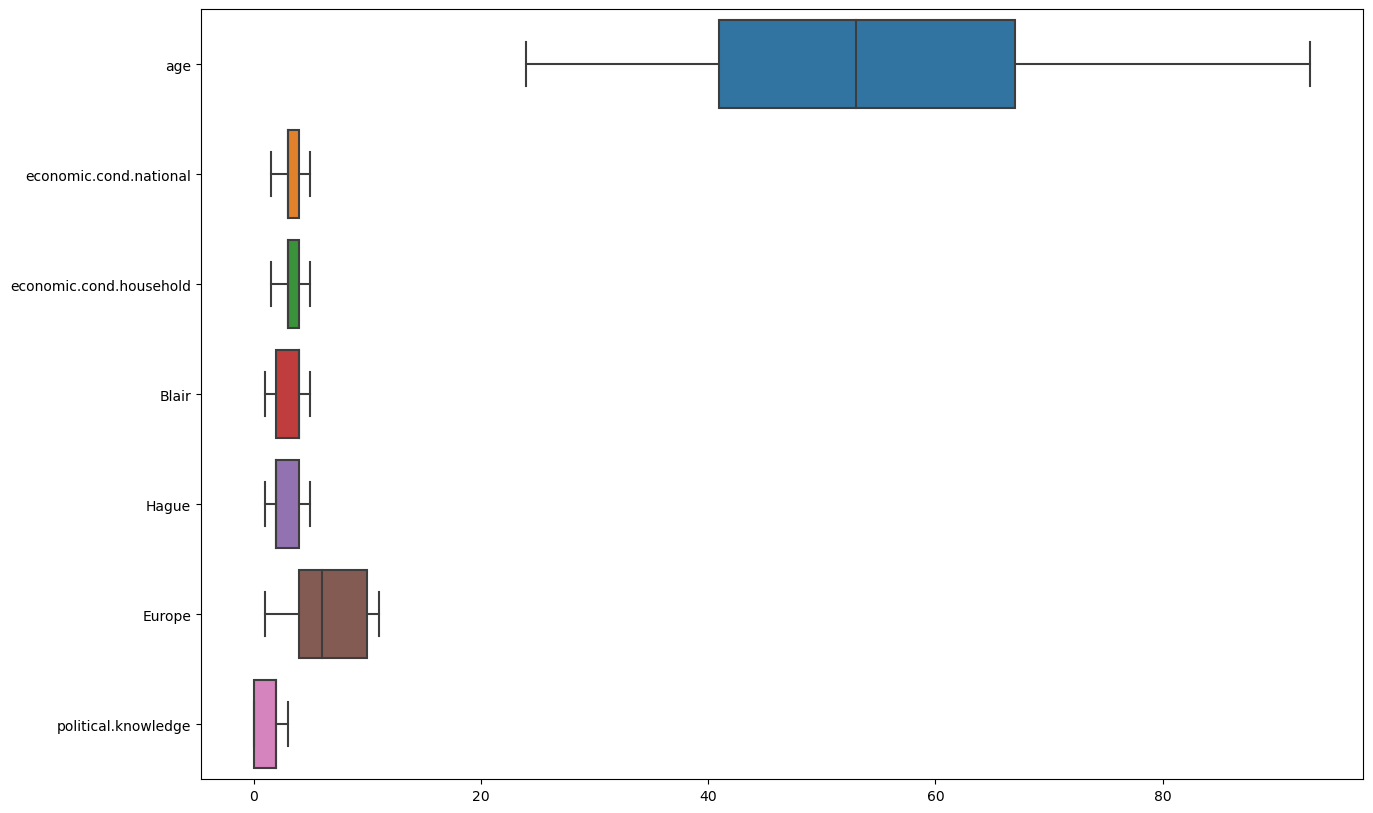

In [37]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=ele_df,orient="h")
plt.show()

All outliers are removed for further analysis

In [38]:
ele_df['age'] = ele_df['age'].astype('int64')
ele_df['economic.cond.national'] = ele_df['economic.cond.national'].astype('int64')
ele_df['economic.cond.household'] = ele_df['economic.cond.household'].astype('int64')
ele_df['Blair'] = ele_df['Blair'].astype('int64')
ele_df['Hague'] = ele_df['Hague'].astype('int64')
ele_df['Europe'] = ele_df['Europe'].astype('int64')
ele_df['political.knowledge'] = ele_df['political.knowledge'].astype('int64')

In [39]:
display(ele_df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [40]:
#Converting Object variables to categorical variables:
for feature in ele_df.columns: 
    if ele_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ele_df[feature].unique()))
        print(pd.Categorical(ele_df[feature].unique()).codes)
        ele_df[feature] = pd.Categorical(ele_df[feature]).codes




feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [41]:
#Codes are an array of integers which are the positions of the actual values in the categories array.
# here vote and gender are categorical variables are now converted into integers using codes

In [42]:
ele_df.vote.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [43]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [44]:
# Converting int8 to int64 variables
ele_df['vote'] = ele_df['vote'].astype('int64')
ele_df['gender'] = ele_df['gender'].astype('int64')

In [45]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [46]:
# all the variables are converted into int64 datatype for model prediction

In [47]:
ele_df_copy = ele_df.copy()
ele_df_copy.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


# Train-Test Split

In [48]:
X=ele_df.drop('vote',axis=1)
y=ele_df[['vote']]

In [49]:
#Applying z score for scaling on variable x - To be used in specific algorithm
age1=['age']
X_scaled=X.copy()
y_new=y.copy()

In [50]:
X_scaled[age1]=X_scaled[age1].apply(lambda x:(x-x.mean())/(x.std()))

In [51]:
#scaling of the data
# Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
# Differences in the scales across input variables may increase the difficulty of the problem being modeled.This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1
# Usually, the distance-based methods(E.g.: KNN) would require scaling as it is sensitive to extreme difference and can cause a bias.
# tree-based method uses split method(E.g.: Decision Trees) would not require scaling in general as its unnecessary
# In this dataset, age is only continuous variable and rest of the variables have 1 to 5 .Age variable is only scaled because it is continuous varibale
# The method of scaling performed only on the ‘age’ variable is the Z-score scaling.
# Z-score scaling is the most common form of scaling that takes from the formula ( (x – mean) / standard deviation).
# All the model prediction are done with scaled data

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [53]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


In [54]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_new, test_size=0.30 , random_state=1)

In [55]:
print('The training set for the independent variables:',X_trains.shape)
print('The training set for the dependent variable:',y_trains.shape)
print('The test set for the independent variables:',X_tests.shape)
print('The test set for the dependent variable:',y_tests.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


In [56]:
#spilting the dataset into train and test set to build Logistic regression and LDA model (70:30)
# X_train :70% of data randomly chosen from the 8 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 8 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "vote" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "vote" columns.These are test ndependent variables

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [57]:
# Logistic regression is a fundamental classification technique.It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression.
# It is the go-to method for binary classification problems (problems with two class values).
# two library is used
# 1.sklearn
# 2.statsmodel

# logistic regression before scaling

In [58]:
#fit the logistic regression model
modellr=LogisticRegression()
modellr.fit(X_train,y_train)

LogisticRegression()

In [59]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

# Predicting on Training and Test dataset

In [60]:
ytrain_predictlr=modellr.predict(X_train)
ytest_predictlr=modellr.predict(X_test)

# Getting the Predicted Classes and Probs

In [61]:
ytest_predict_problr=modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.424712,0.575288
1,0.144486,0.855514
2,0.005832,0.994168
3,0.845143,0.154857
4,0.060465,0.939535


# Model Evaluation

In [62]:
modellr.score(X_train,y_train)

0.8360037700282752

In [63]:
modellr.score(X_test,y_test)

0.8267543859649122

# Applying GridSearchCV for Logistic Regression

In [64]:
grid1={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [65]:
grid1

{'penalty': ['l2', 'none'],
 'solver': ['newton-cg', 'saga'],
 'max_iter': [10000, 100000],
 'tol': [0.0001, 0.001]}

In [66]:
modellr1=LogisticRegression()
modellr1

LogisticRegression()

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:

grid_searchlr = GridSearchCV(estimator = modellr1, param_grid = grid1, cv = 3,n_jobs=-1,scoring='accuracy')

In [69]:
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [70]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(max_iter=10000, penalty='none', solver='saga', tol=0.001)


In [71]:
best_modellr=grid_searchlr.best_estimator_
best_modellr

LogisticRegression(max_iter=10000, penalty='none', solver='saga', tol=0.001)

# Prediction

In [72]:
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)

# The probabilities on the test set

In [73]:
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

,0,1
0,0.936873,0.063127
1,0.109019,0.890981
2,0.249102,0.750898
3,0.128645,0.871355
4,0.019612,0.980388


In [74]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.428332,0.571668
1,0.177059,0.822941
2,0.004400,0.995600
3,0.852263,0.147737
4,0.064016,0.935984


In [75]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_modellr.score(X_train, y_train)
accuracy_lr_train

0.8294062205466541

In [76]:
accuracy_lr_test= best_modellr.score(X_test, y_test)
accuracy_lr_test

0.8201754385964912

In [77]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_modellr.intercept_)

The intercept for the model is : [0.20452792]


In [78]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_modellr.coef_[0][idx]))

The coefficient for age is -0.006855666430507889
The coefficient for economic.cond.national is 0.7136960714136308
The coefficient for economic.cond.household is 0.18720755073002857
The coefficient for Blair is 0.6704203348105644
The coefficient for Hague is -0.7459799395996404
The coefficient for Europe is -0.18361730490422737
The coefficient for political.knowledge is -0.255885101337352
The coefficient for gender is 0.15803952563536702


In [79]:
#The coefficients for each of the independent attributes
# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
# economic.cond.national have more positive coeffiecient . A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase the vote


Feature: 0, Score: -0.00686
Feature: 1, Score: 0.71370
Feature: 2, Score: 0.18721
Feature: 3, Score: 0.67042
Feature: 4, Score: -0.74598
Feature: 5, Score: -0.18362
Feature: 6, Score: -0.25589
Feature: 7, Score: 0.15804


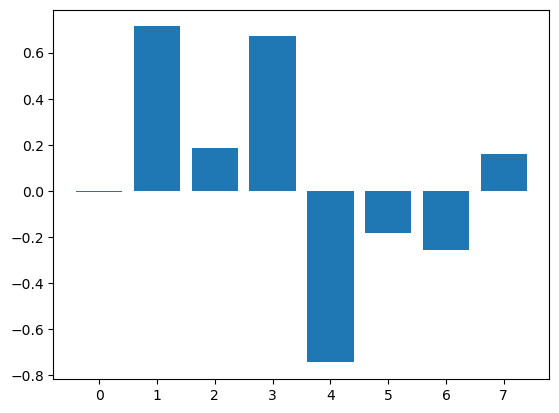

In [80]:
#Feature Importance Graphs
importance = best_modellr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [81]:
#Concentrate X and y into a single Data Frame
data_train1 = pd.concat([X_train,y_train],axis=1)
data_test1=pd.concat([X_test,y_test],axis=1)
data_train1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,34,2,4,1,4,11,2,0,0
1274,40,4,3,4,4,6,0,1,1
649,61,4,3,4,4,7,2,0,0
677,47,3,3,4,2,11,0,1,1
538,44,5,3,4,2,8,0,1,1


# logistic regression after scaling

In [82]:
#fit the logistic regression model
model=LogisticRegression()
model.fit(X_trains,y_trains)

LogisticRegression()

In [83]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

# Predicting on Training and Test dataset

In [84]:
ytrain_predict=model.predict(X_trains)
ytest_predict=model.predict(X_tests)

# Getting the Predicted Classes and Probs

In [85]:
ytest_predict_prob=model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423173,0.576827
1,0.150182,0.849818
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862


# Model Evaluation

In [86]:
#Accuracy - Training Data
model.score(X_trains,y_trains)

0.8312912346842601

In [87]:
#Accuracy - Test Data
model.score(X_tests,y_tests)

0.8355263157894737

# Applying GridSearchCV for Logistic Regression

In [88]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }

In [89]:
model1=LogisticRegression()

In [90]:
grid_search=GridSearchCV(estimator=model1,param_grid=grid,cv=7,n_jobs=-1,scoring='accuracy')

In [91]:
grid_search.fit(X_trains,y_trains)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [92]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [93]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)

# Prediction on the training and test set

In [94]:
ytrain_predictlr1=best_model.predict(X_trains)
ytest_predictlr1=best_model.predict(X_tests)

In [95]:
# The probabilities on the test set

In [96]:
ytrain_predict_prob1=best_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.930158,0.069842
1,0.098631,0.901369
2,0.298621,0.701379
3,0.112252,0.887748
4,0.017899,0.982101


In [97]:
ytest_predict_prob1=best_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.423260,0.576740
1,0.150184,0.849816
2,0.007369,0.992631
3,0.833364,0.166636
4,0.070080,0.929920


In [98]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train=best_model.score(X_trains,y_trains)
accuracy_lr_train

0.8312912346842601

In [99]:
accuracy_lr_test=best_model.score(X_tests,y_tests)
accuracy_lr_test

0.8355263157894737

In [100]:
#Finding the Intercept of the final Model
print('The intercept for the model is : \n',best_model.intercept_)

The intercept for the model is : 
 [1.26153266]


In [101]:
for idx,col_name in enumerate(X_trains.columns):
    print('The Coefficient for {} is {}'.format(col_name,best_model.coef_[0][idx]))

The Coefficient for age is -0.23280693407381448
The Coefficient for economic.cond.national is 0.6288808703535042
The Coefficient for economic.cond.household is 0.06343859923351532
The Coefficient for Blair is 0.6008776957688718
The Coefficient for Hague is -0.8230133830225916
The Coefficient for Europe is -0.21158991653991044
The Coefficient for political.knowledge is -0.32180736773049146
The Coefficient for gender is 0.19209079867250436


Feature: 0, Score: -0.23281
Feature: 1, Score: 0.62888
Feature: 2, Score: 0.06344
Feature: 3, Score: 0.60088
Feature: 4, Score: -0.82301
Feature: 5, Score: -0.21159
Feature: 6, Score: -0.32181
Feature: 7, Score: 0.19209


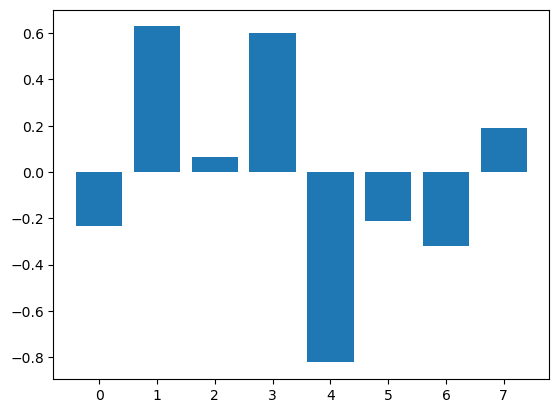

In [102]:
#Feature importance Graphs
importance=best_model.coef_[0]
# Summarize the featue importance
for i,v in enumerate (importance):
    print('Feature: %0d, Score: %.5f'%(i,v))
#Plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.show()

In [103]:
#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
#bestgrid:{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05}
#Accuracy score of training data:83.5%
#Accuracy score of test data:83.5%

In [104]:
#concatenate X(independent) and y (variables) into a single dataframe for logistic regression statsmodel

In [105]:
#Concate X and y into single dataframe
data_train=pd.concat([X_trains,y_trains],axis=1)
data_test=pd.concat([X_tests,y_tests],axis=1)
data_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,-1.289110,2,4,1,4,11,2,0,0
1274,-0.906986,4,3,4,4,6,0,1,1
649,0.430445,4,3,4,4,7,2,0,0
677,-0.461176,3,3,4,2,11,0,1,1
538,-0.652238,5,3,4,2,8,0,1,1


In [106]:
#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
#first, we define the set of dependent(y) and independent(X) variables.  If the dependent variable is in non-numeric form, it is first converted to numeric using encoding
import statsmodels.api as sm

In [107]:
log_reg=sm.Logit(y_trains,X_trains).fit()

Optimization terminated successfully.
         Current function value: 0.375952
         Iterations 7


In [108]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.3750
Time:                        10:47:35   Log-Likelihood:                -398.89
converged:                       True   LL-Null:                       -638.26
Covariance Type:            nonrobust   LLR p-value:                 2.950e-99
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2438      0.091     -2.674      0.007      -0.422      -0.065
economic.cond.national      0.7495      0.107      6.987      0.000       0.539       0.960


# LDA

In [109]:
# Linear Discriminant Analysis(LDA) is a dimensionality reduction technique which is commonly used for the supervised classification problems. 
#It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.
# library used in LDA is sklearn

In [110]:
clf=LinearDiscriminantAnalysis()
model_lda=clf.fit(X_trains,y_trains)


# Prediction

In [111]:
# Training Data class prediction with a cut-off value of 0.5
pred_class_train_lda=model_lda.predict(X_trains)

# Test Data class prediction with a cut-off value of 0.5
pred_class_test_lda=model_lda.predict(X_tests)

In [112]:
ytrain_predict_problda1=model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda1).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [113]:
ytest_predict_problda1=model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda1).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [114]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train=model_lda.score(X_trains,y_trains)
accuracy_lda_train

0.8341187558906692

In [115]:
accuracy_lda_test=model_lda.score(X_tests,y_tests)
accuracy_lda_test

0.8333333333333334

# GridSearchCV

In [116]:
grid_lda={'solver':['svd','lsqr','eigen'],}

In [117]:
model_lda=LinearDiscriminantAnalysis()

In [118]:
grid_search_lda=GridSearchCV(estimator=model_lda,param_grid=grid_lda,cv=7,n_jobs=-1,scoring='accuracy')

In [119]:
grid_search_lda.fit(X_trains,y_trains)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [120]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [121]:
best_model_lda=grid_search_lda.best_estimator_

In [122]:
ytrain_predictlda = best_model_lda.predict(X_trains)
ytest_predictlda = best_model_lda.predict(X_tests)

In [123]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

In [124]:
ytrain_predictlda

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
ytrain_predict_problda=best_model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [126]:
ytest_predict_problda=best_model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [127]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= best_model_lda.score(X_trains, y_trains)
accuracy_lda_train

0.8341187558906692

In [128]:
accuracy_lda_test= best_model_lda.score(X_tests, y_tests)
accuracy_lda_test

0.8333333333333334

In [129]:
#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
# here  'solver':['svd', 'lsqr', 'eigen'] are used with others parameters has default
#‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.

#‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.

#‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.
#bestgrid:{'solver': 'svd'} 
#Accuracy score of training data:83.4%
#Accuracy score of test data:83.3%

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# KNN Model

In [130]:
# KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution.
# In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor
# KNN has the following basic steps:

#Calculate distance
#Find closest neighbors
#Vote for labels
# we will be using popular scikit-learn package.

In [131]:
# The k-nearest neighbor algorithm is imported from the scikit-learn package.
# Create feature and target variables.
# Split data into training and test data.
# Generate a k-NN model using neighbors value.
# Train or fit the data into the model.
# Predict the future.

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_trains,y_trains)

KNeighborsClassifier(n_neighbors=15)

In [134]:
# KNN classifier model.

# First, import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.

# Then, fit your model on the train set using fit() and perform prediction on the test set using predict().


# Let's build KNN classifier model for k=15.

In [135]:
KNN_model.score(X_trains,y_trains)

0.8463713477851084

In [136]:
KNN_model.score(X_tests,y_tests)

0.831140350877193

In [137]:
# Empty list that will hold accuracy score
ac_scores=[]
# perform accuracy metrics for value from 1,3,5,...19
for k in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains,y_trains)
    #evaluate the accuracy
    scores=knn.score(X_tests,y_tests)
    ac_scores.append(scores)
# Changing to Miss Classification error
MCE = [1-x for x in ac_scores]
MCE


[0.2149122807017544,
 0.1885964912280702,
 0.17543859649122806,
 0.18201754385964908,
 0.17543859649122806,
 0.17324561403508776,
 0.17324561403508776,
 0.16885964912280704,
 0.17324561403508776,
 0.16885964912280704]

# Plot misclassification error vs k (with k value on X-axis) using matplotlib

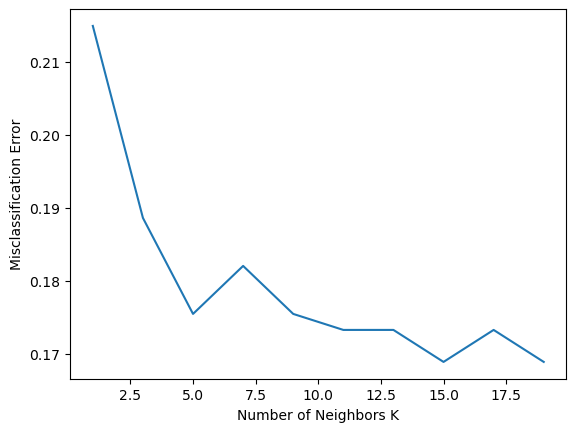

In [138]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2),MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [139]:
# Performance matrix on train data set
y_train_predict_knn=KNN_model.predict(X_trains)
acc_train_knn=KNN_model.score(X_trains,y_trains)
print(acc_train_knn,'\n')
print(metrics.confusion_matrix(y_trains,y_train_predict_knn))
print(metrics.classification_report(y_trains,y_train_predict_knn))

0.8463713477851084 

[[209  98]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [140]:
# Performance matrix on test data set
y_test_predict_knn=KNN_model.predict(X_tests)
acc_test_knn=KNN_model.score(X_tests,y_tests)
print(acc_test_knn,'\n')
print(metrics.confusion_matrix(y_tests,y_test_predict_knn))
print(metrics.classification_report(y_test,y_test_predict_knn))

0.831140350877193 

[[106  47]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [141]:
ytrain_predict_prob_knn=KNN_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_knn).head()

,0,1
0,0.933333,0.066667
1,0.133333,0.866667
2,0.266667,0.733333
3,0.000000,1.000000
4,0.000000,1.000000


In [142]:
ytest_predict_prob_knn=KNN_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.666667,0.333333
1,0.266667,0.733333
2,0.000000,1.000000
3,0.733333,0.266667
4,0.133333,0.866667


In [143]:
# The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
# n_neighbors = 15
#Accuracy score of training data:84.7%
#Accuracy score of test data:83.1%

In [144]:
# N_neighbors (K)
# Simply put, K is the number of neighbors that defines an unlabeled datapoint’s classification boundary.
# K takes in a range of integers (default = 5), finds the K-nearest neighbors, calculates the distance from each unlabeled point to those K-neighbors. How distance is calculated is defined by the metrics parameter explained below.


# KNN with GridSearchCV

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
grid_knn={'n_neighbors':[ 5,7,10,15],
      'weights': ['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']      
      }

In [147]:
model_knn = KNeighborsClassifier()

In [148]:
grid_search_knn = GridSearchCV(estimator = model_knn, param_grid = grid_knn,n_jobs=-1, cv = 7,scoring='accuracy')

In [149]:
grid_search_knn.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [150]:
print(grid_search_knn.best_params_,'\n')

print(grid_search_knn.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'} 

KNeighborsClassifier(n_neighbors=10)


In [151]:
grid_search_knn.score(X_trains,y_trains)

0.8529688972667295

In [152]:
grid_search_knn.score(X_tests,y_tests)

0.8333333333333334

In [153]:
# Leaf_size determines how many observations are captured in each leaf of either the BallTree of KDTree algorithms, which ultimately make the classification. 
# Weights is the function that weights the data when making a prediction. “Uniform” is an equal weighted function, while “distance” weights the points by the inverse of their distance
# Metric can be set to various distance metrics like Manhattan, Euclidean, Minkowski, or weighted Minkowski (default is “minkowski” with a p=2, which is the Euclidean distance). 


# Gaussian Naive Bayes

In [154]:
# Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. 
# Gaussian Naive Bayes – This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.All we would have to do is estimate the mean and standard deviation ofthe continuous variable. 
# here we use  library scikit-learn

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

In [157]:
#We now fit our model to the GaussianNB model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

In [158]:
NB_model = GaussianNB()
NB_model.fit(X_trains, y_trains)

GaussianNB()

In [159]:
y_train_predict_nb = NB_model.predict(X_trains)
acc_train_nb = NB_model.score(X_trains, y_trains)                      ## Accuracy
print(acc_train_nb)
print(metrics.confusion_matrix(y_trains, y_train_predict_nb))          ## confusion_matrix
print(metrics.classification_report(y_trains, y_train_predict_nb))     ## classification_report

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [160]:
## Performance Matrix on test data set
y_test_predict_nb = NB_model.predict(X_tests)
acc_test_nb = NB_model.score(X_tests, y_tests)                    ## Accuracy
print(acc_test_nb)
print(metrics.confusion_matrix(y_tests, y_test_predict_nb))         ## confusion_matrix
print(metrics.classification_report(y_tests, y_test_predict_nb))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [161]:
ytrain_predict_prob_nb=NB_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_nb).head()

,0,1
0,0.984678,0.015322
1,0.065437,0.934563
2,0.271735,0.728265
3,0.080026,0.919974
4,0.007648,0.992352


In [162]:
    ytest_predict_prob_nb=NB_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_nb).head()

,0,1
0,0.536792,0.463208
1,0.120285,0.879715
2,0.000332,0.999668
3,0.945240,0.054760
4,0.039267,0.960733


In [163]:
#Accuracy score of training data:83.5%
#Accuracy score of test data:82.2%

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [164]:
# Tuning is the process of maximizing a model’s performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.”

# Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model. Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods. Instead, these parameters must be set manually. Many methods exist for selecting appropriate hyperparameters. 


In [165]:
# Grid Search
# Grid Search, also known as parameter sweeping, is one of the most basic and traditional methods of hyperparametric optimization. This method involves manually defining a subset of the hyperparametric space and exhausting all combinations of the specified hyperparameter subsets. Each combination’s performance is then evaluated, typically using cross-validation, and the best performing hyperparametric combination is chosen.


# Bagging with randomforest

In [166]:
# A Bagging classifier.

# A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., RandomForest), by introducing randomization into its construction procedure and then making an ensemble out of it.
# Bagging and random forests are “bagging” algorithms that aim to reduce the complexity of models that overfit the training data. 


In [167]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=101,random_state=1)
model_bag.fit(X_trains, y_trains)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [168]:
# Bagging (Random Forest should be applied for Bagging)

In [169]:
y_train_predict_bag = model_bag.predict(X_trains)
y_test_predict_bag = model_bag.predict(X_tests)

In [170]:
acc_bag_train =model_bag.score(X_trains, y_trains)
acc_bag_train

0.8360037700282752

In [171]:
acc_bag_test =model_bag.score(X_tests, y_tests)
acc_bag_test

0.8223684210526315

In [172]:
ytrain_predict_prob_bag=model_bag.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_bag).head()

,0,1
0,0.765182,0.234818
1,0.181478,0.818522
2,0.372432,0.627568
3,0.117474,0.882526
4,0.060569,0.939431


In [173]:
ytest_predict_prob_bag=model_bag.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.442012,0.557988
1,0.197157,0.802843
2,0.023259,0.976741
3,0.710910,0.289090
4,0.320904,0.679096


In [174]:
# set the hyper parameters in randomforest classifier
# N_estimators (only used in Random Forests) is the number of decision trees used in making the forest (default = 100). 
# Max_depth is an integer that sets the maximum depth of the tree. The default is None, which means the nodes are expanded until all the leaves are pure 
# Min_samples_split is the minimum number of samples required to split an internal node. 
# Min_samples_leaf defines the minimum number of samples needed at each leaf. The default input here is 1.

#We now fit randomforest classifier model to the bagging model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.
#Accuracy score of training data:83.6%
#Accuracy score of test data:82.2%

# AdaBoostClassifier

In [175]:
#  Boosting is an ensemble strategy thats consecutively builds on weak learners in order to generate one final strong learner. A weak learner is a model that may not be very accurate or may not take many predictors into account. By building a weak model, making conclusions about the various feature importances and parameters, and then using those conclusions to build a new, stronger model, Boosting can effectively convert weak learners into a strong learner.
# AdaBoost (Adaptive Boosting): AdaBoost uses decision stumps as weak learners. A Decision Stump is a Decision Tree model that only splits off at one level, ergo the final prediction is based off of only one feature. When AdaBoost makes its first Decision Stump, all observations are weighted evenly. 
# In an attempt to correct previous error, when moving to the second Decision Stump, the observations that were classified incorrectly now carry more weight than the observations that were correctly classified. AdaBoost continues this strategy until the best classification model is built.


In [176]:
from sklearn.ensemble import AdaBoostClassifier


In [177]:
ADa_model = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ADa_model.fit(X_trains,y_trains)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [178]:
y_train_predict_Ada = ADa_model.predict(X_trains)
y_test_predict_Ada = ADa_model.predict(X_tests)

In [179]:
ADa_train =ADa_model.score(X_trains, y_trains)
ADa_train

0.8501413760603205

In [180]:
ADa_test=ADa_model.score(X_tests, y_tests)
ADa_test

0.8135964912280702

# GridSearchCV ADA boosting

In [181]:
grid_ADa={'n_estimators':[51,101,151],"learning_rate":[1.0,0.001,0.01,0.2,0.3], "algorithm":["SAMME.R"]}

In [182]:
model_ADa = AdaBoostClassifier()

In [183]:
grid_search_ADa = GridSearchCV(estimator = model_ADa, param_grid = grid_ADa, cv = 7,n_jobs=-1,scoring='accuracy')

In [184]:
grid_search_ADa.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [51, 101, 151]},
             scoring='accuracy')

In [185]:
print(grid_search_ADa.best_params_,'\n')
print(grid_search_ADa.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 51} 

AdaBoostClassifier(learning_rate=0.3, n_estimators=51)


In [186]:
best_model_ADa = grid_search_ADa.best_estimator_

In [187]:
ytrain_predict_ADa = best_model_ADa.predict(X_trains)
ytest_predict_ADa = best_model_ADa.predict(X_tests)

In [188]:
ytrain_predict_prob_ADa=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ADa).head()

,0,1
0,0.525024,0.474976
1,0.459948,0.540052
2,0.486375,0.513625
3,0.465187,0.534813
4,0.450924,0.549076


In [189]:
ytest_predict_prob_ADa=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_ADa).head()

,0,1
0,0.503244,0.496756
1,0.477533,0.522467
2,0.402849,0.597151
3,0.526377,0.473623
4,0.474901,0.525099


In [190]:
# Accuracy - Training Data
# Training Accuracy
accuracy_ADa_train= best_model_ADa.score(X_trains, y_trains)
accuracy_ADa_train

0.8416588124410933

In [191]:
accuracy_ADa_test= best_model_ADa.score(X_tests, y_tests)
accuracy_ADa_test

0.8201754385964912

In [192]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.525024,0.474976
1,0.459948,0.540052
2,0.486375,0.513625
3,0.465187,0.534813
4,0.450924,0.549076


In [193]:
ytrain_predict_prob_ada=best_model_ADa.predict_proba(X_tests)
pd.DataFrame(ytrain_predict_prob_ada).head()

,0,1
0,0.503244,0.496756
1,0.477533,0.522467
2,0.402849,0.597151
3,0.526377,0.473623
4,0.474901,0.525099


In [194]:
#Using GridsearchCV, we input various parameters like {'algorithm', 'learning_rate', 'n_estimators'}  which will helps us to find best grid for prediction of the better model
# N_estimators is the maximum number of estimators at which boosting is terminated. If a perfect fit is reached, the algo is stopped. The default here is 50.
# Learning_rate is the rate at which we are adjusting the weights of our model with respect to the loss gradient.
# The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.
#bestgrid:{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 51} 
#Accuracy score of training data:84.1%
#Accuracy score of test data:82.0%

# Gradient Boosting

In [195]:
# Gradient Boosting for classification.

# GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [196]:
from sklearn.ensemble import GradientBoostingClassifier

In [197]:
gbcl = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gbcl = gbcl.fit(X_trains, y_trains)

In [198]:
y_train_predict_gbcl = gbcl.predict(X_trains)

In [199]:
y_test_predict_gbcl = gbcl.predict(X_tests)

In [200]:
gbcl.score(X_trains, y_trains)

0.8803016022620169

In [201]:
gbcl.score(X_tests, y_tests)

0.8333333333333334

In [202]:
grid_gbcl={"criterion" : ['friedman_mse',"mse"],"loss":['exponential'],"max_features":[5,6,7],
                                "min_samples_split":[50,40,30],"n_estimators":[101,51]}

In [203]:
model_gbcl = GradientBoostingClassifier()

In [204]:
grid_search_gbcl = GridSearchCV(estimator = model_gbcl, param_grid = grid_gbcl, cv = 7,n_jobs=-1,scoring='accuracy')

In [205]:
grid_search_gbcl.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['exponential'], 'max_features': [5, 6, 7],
                         'min_samples_split': [50, 40, 30],
                         'n_estimators': [101, 51]},
             scoring='accuracy')

In [206]:
best_model_gbcl = grid_search_gbcl.best_estimator_

In [207]:
ytrain_predict_gbcl = best_model_gbcl.predict(X_trains)
ytest_predict_gbcl = best_model_gbcl.predict(X_tests)

In [208]:
ytrain_predict_prob_gbcl=best_model_gbcl.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_gbcl).head()

,0,1
0,0.812000,0.188000
1,0.081513,0.918487
2,0.398479,0.601521
3,0.049138,0.950862
4,0.024185,0.975815


In [209]:
ytest_predict_prob_gbcl=best_model_gbcl.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_gbcl).head()

,0,1
0,0.630286,0.369714
1,0.213544,0.786456
2,0.003646,0.996354
3,0.828032,0.171968
4,0.111205,0.888795


In [210]:
# Accuracy - Training Data
# Training Accuracy
accuracy_gbcl_train= best_model_gbcl.score(X_trains, y_trains)
accuracy_gbcl_train

0.8746465598491989

In [211]:
accuracy_gbcl_test= best_model_gbcl.score(X_tests, y_tests)
accuracy_gbcl_test

0.8377192982456141

In [212]:
#Using GridsearchCV, we input various parameters like {'criterion', 'loss', 'max_features', 'min_samples_split', 'n_estimators}   which will helps us to find best grid for prediction of the better model
# best_params: {'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 6, 'min_samples_split': 30, 'n_estimators': 51} 
#best_estimator:GradientBoostingClassifier(loss='exponential', max_features=6, min_samples_split=30, n_estimators=51)
#Accuracy score of training data:87.4%
#Accuracy score of test data:83.3%

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

# Logistic Regression Model

In [213]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [214]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# Confusion matrix on the training and test data

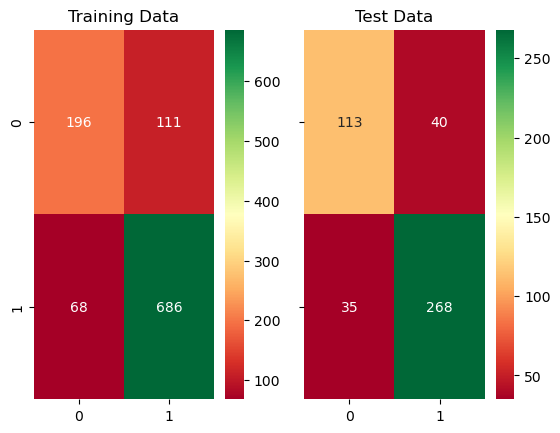

In [215]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,ytrain_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,ytest_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [216]:
# Inference:
# Logistic regression
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 196 False Positive : 111
#False Negative : 68 True Positive : 686
#Test data:
#True Negative : 113 False Positive : 40
#False Negative : 35 True Positive : 268

# Classification Report of training and test data

In [217]:
print(classification_report(y_trains, ytrain_predictlr1),'\n');
print(classification_report(y_tests, ytest_predictlr1),'\n');

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



# AUC and ROC for the training data

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


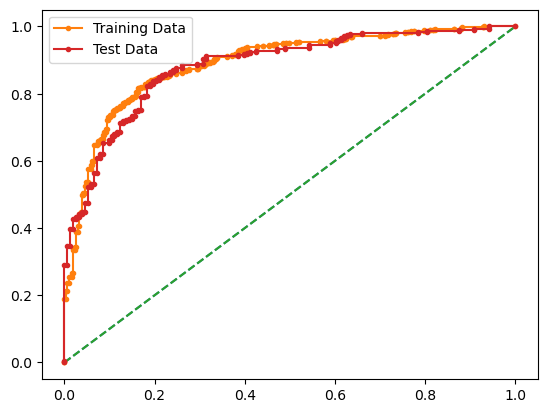

In [218]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_trains,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_tests,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [219]:
metrics=classification_report(y_trains, ytrain_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.86
LR_train_recall  0.91
LR_train_f1  0.88


In [220]:
metrics=classification_report(y_tests, ytest_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.87
LR_test_recall  0.88
LR_test_f1  0.88


In [221]:
#Logistic regression
# Train Data:
### AUC: 89%
### Accuracy: 83%
### precision : 86%
#recall : 91%
#f1  :88%

# Test Data:
### AUC: 88.3%
### Accuracy: 84%
### precision: 87%
#recall : 88%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# LinearDiscriminantAnalysis

In [222]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [223]:
metrics=classification_report(y_trains,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)

LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [224]:
metrics=classification_report(y_tests,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.86
LDA_test_recall  0.89
LDA_test_f1  0.88


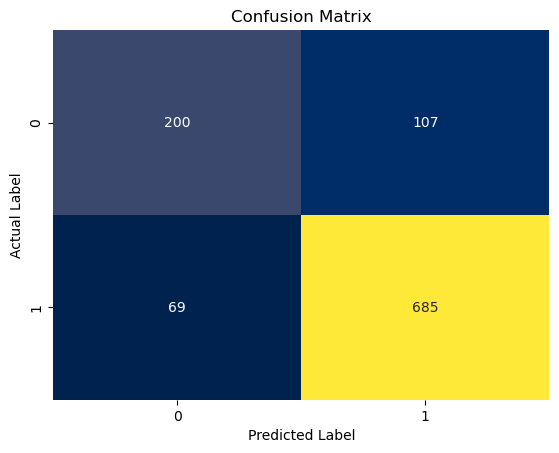

In [225]:
confusion_matrix(y_trains,pred_class_train_lda)
sns.heatmap(confusion_matrix(y_trains,pred_class_train_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

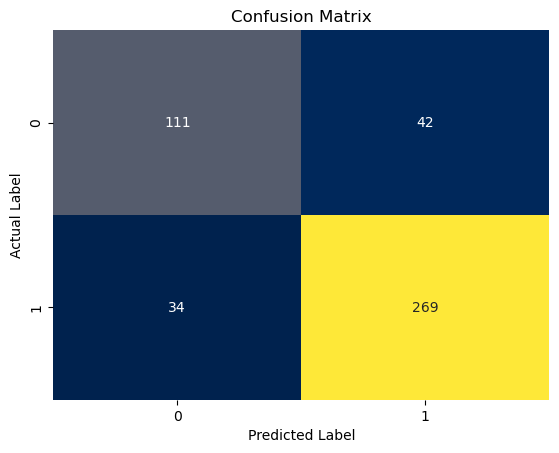

In [226]:
confusion_matrix(y_tests,pred_class_test_lda)
sns.heatmap(confusion_matrix(y_tests,pred_class_test_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

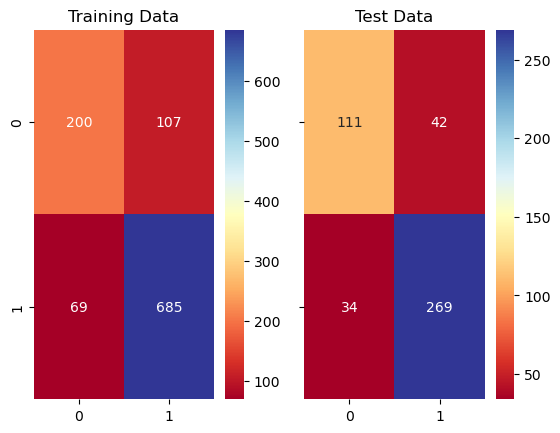

In [228]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,pred_class_train_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,pred_class_test_lda)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [229]:
# Inference:
#LDA
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 200 False Positive : 107
#False Negative : 69 True Positive : 685
#Test data:
#True Negative : 111 False Positive : 42
#False Negative : 34 True Positive : 269

In [230]:
print(classification_report(y_trains, pred_class_train_lda),'\n');
print(classification_report(y_tests,pred_class_test_lda),'\n');

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


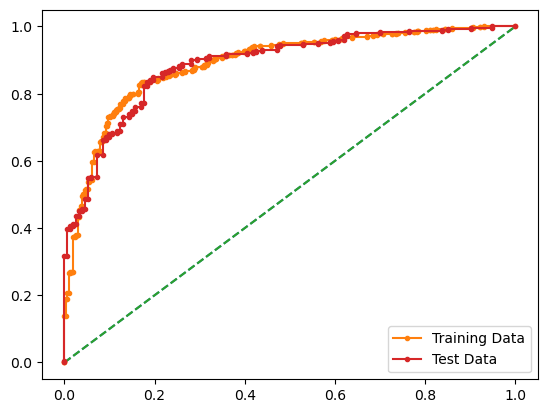

In [231]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = metrics.roc_auc_score(y_trains, ytrain_predict_problda[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_tests,ytest_predict_problda[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_problda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [232]:
model_lda.fit(X_trains,y_trains)

LinearDiscriminantAnalysis()

Cart_train_AUC: 0.889


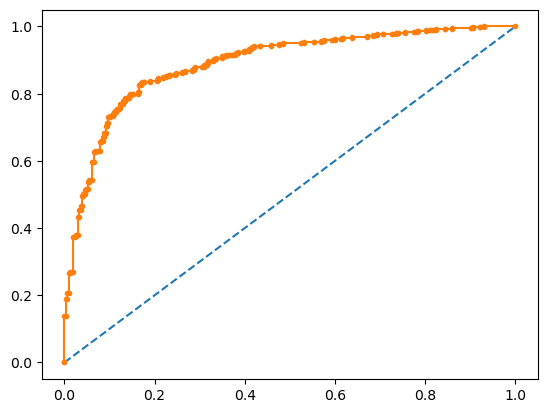

In [233]:
# predict probabilities
probs = model_lda.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_train_AUC = roc_auc_score(y_trains, probs)
print('Cart_train_AUC: %.3f' % Cart_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_trains, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [234]:
# Train Data:
### AUC: 88.9%
### Accuracy: 83%
### precision : 86%
#recall : 91%
#f1  :89%

# Test Data:
### AUC: 88.8%
### Accuracy: 83%
### precision :86%
#recall : 89%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

Cart_train_AUC: 0.888


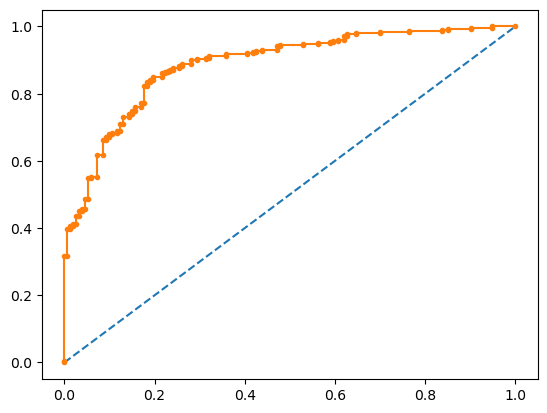

In [235]:
# predict probabilities
probs = model_lda.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Cart_train_AUC = roc_auc_score(y_tests, probs)
print('Cart_train_AUC: %.3f' % Cart_train_AUC)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_tests, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# KNN Model

In [236]:
metrics=classification_report(y_trains,y_train_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('knn_train_precision ',train_precision_knn)
print ('knn_train_recall ',train_recall_knn)
print ('knn_train_f1 ',train_f1_knn)

knn_train_precision  0.88
knn_train_recall  0.91
knn_train_f1  0.89


In [237]:
metrics=classification_report(y_tests,y_test_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('knn_test_precision ',test_precision_knn)
print ('knn_test_recall ',test_recall_knn)
print ('knn_test_f1 ',test_f1_knn)

knn_test_precision  0.85
knn_test_recall  0.9
knn_test_f1  0.88


In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 

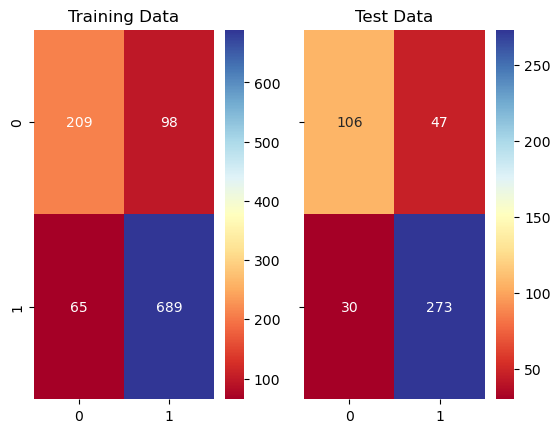

In [239]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_knn)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [240]:
# Inference:
# KNN
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 209 False Positive : 98
#False Negative : 64 True Positive : 690
#Test data:
#True Negative : 116 False Positive : 47
#False Negative : 30 True Positive : 273

In [241]:
print(classification_report(y_trains,y_train_predict_knn),'\n');
print(classification_report(y_tests,y_test_predict_knn),'\n');

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061
 

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.910
AUC for the Test Data: 0.893


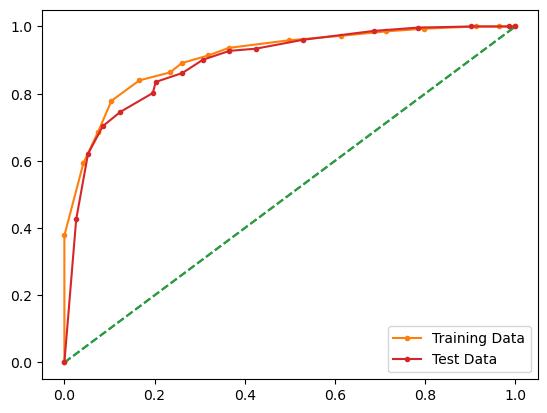

In [242]:
# AUC and ROC for the training data

# calculate AUC
train_auc_knn  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_knn[:,1])
print('AUC for the Training Data: %.3f' % train_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_knn = metrics.roc_auc_score(y_tests,ytest_predict_prob_knn[:,1])
print('AUC for the Test Data: %.3f' % test_auc_knn)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_knn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [243]:
# Train Data:
### AUC: 91%
### Accuracy: 85%
### precision : 88%
#recall : 92%
#f1  :89%

# Test Data:
### AUC: 89.3%
### Accuracy: 83%
### precision :85%
#recall : 90%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# naive model

In [244]:
metrics=classification_report(y_trains,y_train_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_nb=round(df.loc["1"][0],2)
train_recall_nb=round(df.loc["1"][1],2)
train_f1_nb=round(df.loc["1"][2],2)
print ('nb_train_precision ',train_precision_nb)
print ('nb_train_recall ',train_recall_nb)
print ('nb_train_f1 ',train_f1_nb)

nb_train_precision  0.88
nb_train_recall  0.9
nb_train_f1  0.89


In [245]:
metrics=classification_report(y_tests,y_test_predict_nb,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_nb=round(df.loc["1"][0],2)
test_recall_nb=round(df.loc["1"][1],2)
test_f1_nb=round(df.loc["1"][2],2)
print ('nb_test_precision ',test_precision_nb)
print ('nb_test_recall ',test_recall_nb)
print ('nb_test_f1 ',test_f1_nb)

nb_test_precision  0.87
nb_test_recall  0.87
nb_test_f1  0.87


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

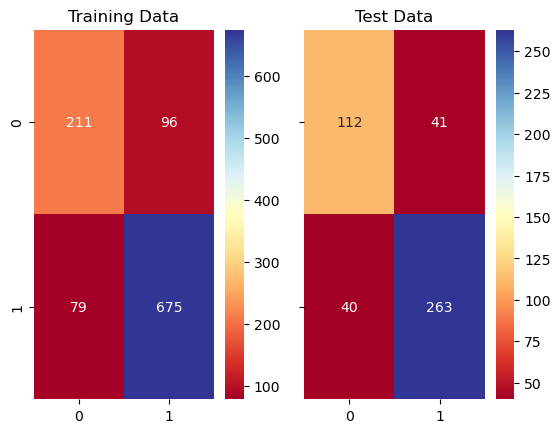

In [247]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_nb)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [248]:
# Inference:
# NB
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 211 False Positive : 96
#False Negative : 79 True Positive : 675
#Test data:
#True Negative : 112 False Positive : 41
#False Negative : 40 True Positive : 263

In [249]:
print(classification_report(y_trains,y_train_predict_nb),'\n');
print(classification_report(y_tests,y_test_predict_nb),'\n');

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


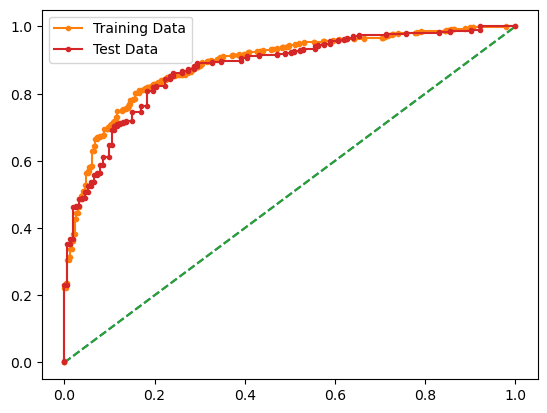

In [250]:
# AUC and ROC for the training data

# calculate AUC
train_auc_nb  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_nb[:,1])
print('AUC for the Training Data: %.3f' % train_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_nb = metrics.roc_auc_score(y_tests,ytest_predict_prob_nb[:,1])
print('AUC for the Test Data: %.3f' % test_auc_nb)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_nb[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [251]:
# Train Data:
### AUC: 88.8%
### Accuracy: 84%
### precision : 88%
#recall : 90%
#f1  :89%

# Test Data:
### AUC: 87.6%
### Accuracy: 82%
### precision :88%
#recall : 88%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# Bagging with randomforest

In [252]:
metrics=classification_report(y_trains,y_train_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_bag=round(df.loc["1"][0],2)
train_recall_bag=round(df.loc["1"][1],2)
train_f1_bag=round(df.loc["1"][2],2)
print ('bag_train_precision ',train_precision_bag)
print ('bag_train_recall ',train_recall_bag)
print ('bag_train_f1 ',train_f1_bag)

bag_train_precision  0.85
bag_train_recall  0.93
bag_train_f1  0.89


In [253]:
metrics=classification_report(y_tests,y_test_predict_bag,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_bag=round(df.loc["1"][0],2)
test_recall_bag=round(df.loc["1"][1],2)
test_f1_bag=round(df.loc["1"][2],2)
print ('bag_test_precision ',test_precision_bag)
print ('bag_test_recall ',test_recall_bag)
print ('bag_test_f1 ',test_f1_bag)

bag_test_precision  0.82
bag_test_recall  0.93
bag_test_f1  0.87


In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

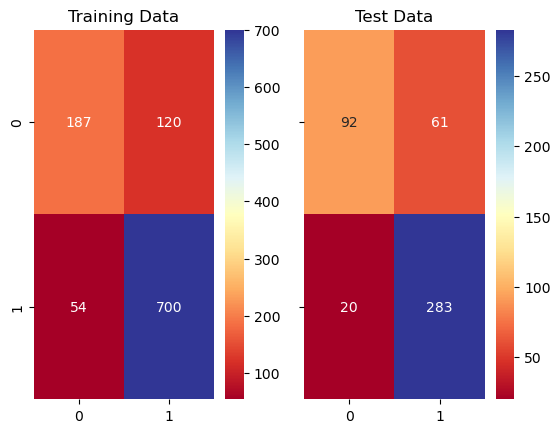

In [255]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,y_train_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,y_test_predict_bag)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [256]:
# Inference:
#BAGGING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 187 False Positive : 120
#False Negative : 54 True Positive : 700
#Test data:
#True Negative : 92 False Positive : 61
#False Negative : 20 True Positive : 283

In [257]:
print(classification_report(y_trains,y_train_predict_bag),'\n');
print(classification_report(y_tests,y_test_predict_bag),'\n');

              precision    recall  f1-score   support

           0       0.78      0.61      0.68       307
           1       0.85      0.93      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061
 

              precision    recall  f1-score   support

           0       0.82      0.60      0.69       153
           1       0.82      0.93      0.87       303

    accuracy                           0.82       456
   macro avg       0.82      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456
 



AUC for the Training Data: 0.897
AUC for the Test Data: 0.884


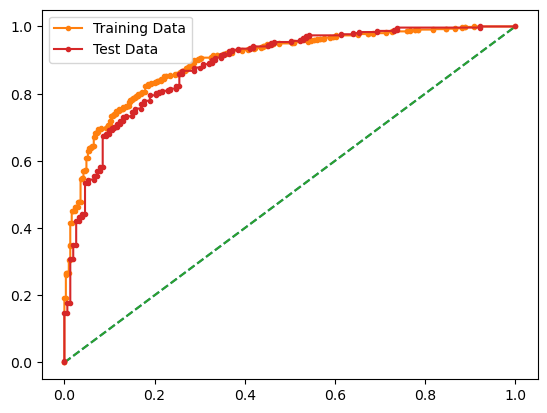

In [258]:
# AUC and ROC for the training data

# calculate AUC
train_auc_bag  = metrics.roc_auc_score(y_trains, ytrain_predict_prob_bag[:,1])
print('AUC for the Training Data: %.3f' % train_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains, ytrain_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_bag = metrics.roc_auc_score(y_tests,ytest_predict_prob_bag[:,1])
print('AUC for the Test Data: %.3f' % test_auc_bag)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_bag[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [259]:
# Train Data:
### AUC: 89.7%
### Accuracy: 84%
### precision : 85%
#recall : 93%
#f1  :89%

# Test Data:
### AUC: 88.4%
### Accuracy: 82%
### precision :82%
#recall : 91%
#f1 : 87%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# AdaBoostClassifier

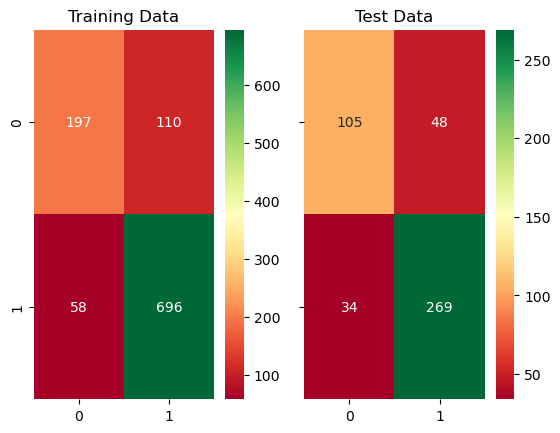

In [260]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_ADa)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [261]:
# Inference:
# ADA BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 197 False Positive : 110
#False Negative : 58 True Positive : 696
#Test data:
#True Negative : 105 False Positive : 48
#False Negative : 34 True Positive : 269

In [262]:
print(classification_report(y_trains, ytrain_predict_ADa),'\n');
print(classification_report(y_tests, ytest_predict_ADa),'\n');

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.906
AUC for the Test Data: 0.889


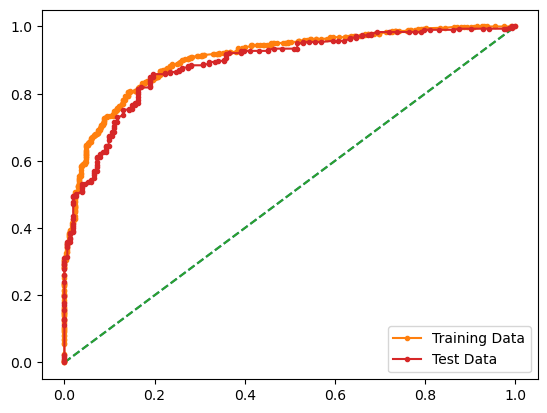

In [263]:
# AUC and ROC for the training data

# calculate AUC
train_auc_ADa = metrics.roc_auc_score(y_trains,ytrain_predict_prob_ADa[:,1])
print('AUC for the Training Data: %.3f' % train_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_ADa = metrics.roc_auc_score(y_tests,ytest_predict_prob_ADa[:,1])
print('AUC for the Test Data: %.3f' %test_auc_ADa)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_ADa[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [264]:
metrics=classification_report(y_trains, ytrain_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_ADa=round(df.loc["1"][0],2)
train_recall_ADa=round(df.loc["1"][1],2)
train_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_train_precision ',train_precision_ADa)
print ('ADa_train_recall ',train_recall_ADa)
print ('ADa_train_f1 ',train_f1_ADa)

ADa_train_precision  0.86
ADa_train_recall  0.92
ADa_train_f1  0.89


In [265]:
metrics=classification_report(y_tests, ytest_predict_ADa,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_ADa=round(df.loc["1"][0],2)
test_recall_ADa=round(df.loc["1"][1],2)
test_f1_ADa=round(df.loc["1"][2],2)
print ('ADa_test_precision ',test_precision_ADa)
print ('ADa_test_recall ',test_recall_ADa)
print ('ADatest_f1 ',test_f1_ADa)

ADa_test_precision  0.85
ADa_test_recall  0.89
ADatest_f1  0.87


In [266]:
# Train Data:
### AUC: 90.6%
### Accuracy: 84%
### precision : 85%
#recall : 92%
#f1  :89%

# Test Data:
### AUC: 88.9%
### Accuracy: 82%
### precision :85%
#recall : 89%
#f1 : 87%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

# Gradient Boosting

In [267]:
from sklearn import metrics

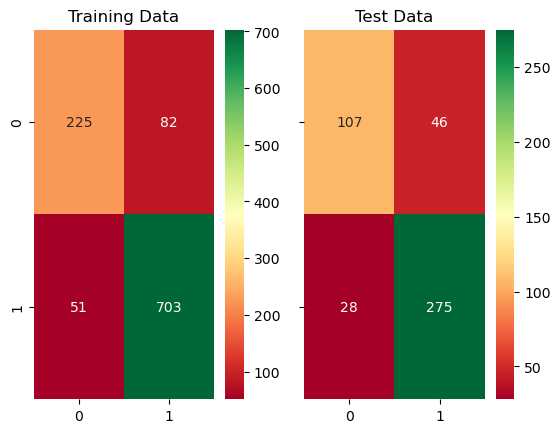

In [268]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains, ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests, ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [269]:
# Inference:
# GRADIENT BOOSTING 
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 224 False Positive : 83
#False Negative : 51 True Positive : 703
#Test data:
#True Negative : 107 False Positive : 46
#False Negative : 30 True Positive : 273

In [270]:
print(classification_report(y_trains, ytrain_predict_gbcl),'\n');
print(classification_report(y_tests, ytest_predict_gbcl),'\n');

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       307
           1       0.90      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061
 

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       153
           1       0.86      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456
 



AUC for the Training Data: 0.933
AUC for the Test Data: 0.904


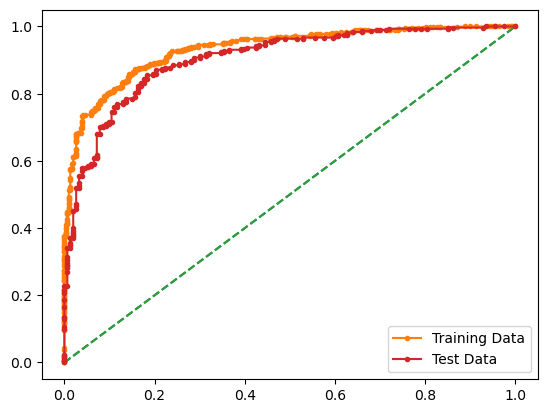

In [271]:
# AUC and ROC for the training data

# calculate AUC
train_auc_gbcl = metrics.roc_auc_score(y_trains,ytrain_predict_prob_gbcl[:,1])
print('AUC for the Training Data: %.3f' % train_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_gbcl = metrics.roc_auc_score(y_tests,ytest_predict_prob_gbcl[:,1])
print('AUC for the Test Data: %.3f' %test_auc_gbcl)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob_gbcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [272]:
metrics=classification_report(y_trains, ytrain_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_gbcl=round(df.loc["1"][0],2)
train_recall_gbcl=round(df.loc["1"][1],2)
train_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_train_precision ',train_precision_gbcl)
print ('gbcl_train_recall ',train_recall_gbcl)
print ('gbcl_train_f1 ',train_f1_gbcl)

gbcl_train_precision  0.9
gbcl_train_recall  0.93
gbcl_train_f1  0.91


In [273]:
metrics=classification_report(y_tests, ytest_predict_gbcl,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_gbcl=round(df.loc["1"][0],2)
test_recall_gbcl=round(df.loc["1"][1],2)
test_f1_gbcl=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',test_precision_gbcl)
print ('gbcl_test_recall ',test_recall_gbcl)
print ('gbcl_test_f1 ',test_f1_gbcl)

gbcl_test_precision  0.86
gbcl_test_recall  0.91
gbcl_test_f1  0.88


In [274]:
# Train Data:
### AUC: 93.4%
### Accuracy: 87%
### precision : 89%
#recall : 93%
#f1  :91%

# Test Data:
### AUC: 90.1%
### Accuracy: 83%
### precision :86%
#recall : 90%
#f1 : 88%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting

In [275]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda],
        'KNN Train':[acc_train_knn,train_auc_knn,train_recall_knn,train_precision_knn,train_f1_knn],
        'KNN Test':[acc_test_knn,test_auc_knn,test_recall_knn,test_precision_knn,test_f1_knn],
        'NB Train':[acc_train_nb,train_auc_nb,train_recall_nb,train_precision_nb,train_f1_nb],
        'NB Test':[acc_test_nb,test_auc_nb,test_recall_nb,test_precision_nb,test_f1_nb],
        'BAGGING Train':[acc_bag_train ,train_auc_bag,train_recall_bag,train_precision_bag,train_f1_bag],
        'BAGGING Test':[acc_bag_test,test_auc_bag,test_recall_bag,test_precision_bag,test_f1_bag],
        'ADA Train':[accuracy_ADa_train,train_auc_ADa,train_recall_ADa,train_precision_ADa,train_f1_ADa],
        'ADA Test':[accuracy_ADa_test,test_auc_ADa,test_recall_ADa,test_precision_ADa,test_f1_ADa],
        'Gradient Train':[accuracy_gbcl_train,train_auc_gbcl,train_recall_gbcl,train_precision_gbcl,train_f1_gbcl],
        'Gradient Test':[accuracy_gbcl_train,test_auc_gbcl,test_recall_gbcl,test_precision_gbcl,test_f1_gbcl]},index=index)   
                     
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,BAGGING Train,BAGGING Test,ADA Train,ADA Test,Gradient Train,Gradient Test
Accuracy,0.83,0.84,0.83,0.83,0.85,0.83,0.84,0.82,0.84,0.82,0.84,0.82,0.87,0.87
AUC,0.89,0.88,0.89,0.89,0.91,0.89,0.89,0.88,0.90,0.88,0.91,0.89,0.93,0.90
Recall,0.91,0.88,0.91,0.89,0.91,0.90,0.90,0.87,0.93,0.93,0.92,0.89,0.93,0.91
Precision,0.86,0.87,0.86,0.86,0.88,0.85,0.88,0.87,0.85,0.82,0.86,0.85,0.90,0.86
F1 Score,0.88,0.88,0.89,0.88,0.89,0.88,0.89,0.87,0.89,0.87,0.89,0.87,0.91,0.88


In [276]:
# Comparing all the model ,Gradient boosting model is best model for this dataset with accuracy of 87% in both training and test set
# AUC of Train and test in Gradient boosting model is 93% and 90% respectively
# f1 score of Train and test in Gradient boosting model is 91% and 88% respectively
# Precision  of Train and test in Gradient boosting model is 89% and 86% respectively
# Recall of Train and test in Gradient boosting model is 93% and 90% respectively

# Accuracy ,AUC,Precision,Recall for test data are almost inline with training data in Gradient boosting model.This indicates no overfitting or underfitting in the model


In [286]:
# Sample voter information
test_sample = [(4,6,10,8,20,11,7,21)]
#Create a DataFrame object
test_df = pd.DataFrame(test_sample, columns = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'])

In [289]:
#labour = 1 , conservative = 0

test_predict_lr =  best_model.predict(test_df)
test_predict_lda = best_model_lda.predict(test_df)
test_predict_knn = KNN_model.predict(test_df) 
test_predict_nb = NB_model.predict(test_df)
test_predict_bag = model_bag.predict(test_df)
test_predict_ada = ADa_model.predict(test_df)
test_predict_gb = best_model_ADa.predict(test_df)

In [290]:
outcome_lr = pd.DataFrame(test_predict_lr)
outcome_lr[0]=np.where(outcome_lr[0] == 1," labour party","conservative party")
outcome_lda = pd.DataFrame(test_predict_lda)
outcome_lda[0]=np.where(outcome_lda[0] == 1," labour party","conservative party")
outcome_knn = pd.DataFrame(test_predict_knn)
outcome_knn[0]=np.where(outcome_knn[0] == 1,"labour party","conservative party")
outcome_nb = pd.DataFrame(test_predict_nb)
outcome_nb[0]=np.where(outcome_nb[0] == 1,"labour party","conservative party")
outcome_bag = pd.DataFrame(test_predict_bag)
outcome_bag[0]=np.where(outcome_bag[0] == 1,"labour party","conservative party")
outcome_ada = pd.DataFrame(test_predict_ada)
outcome_ada[0]=np.where(outcome_ada[0] == 1,"labour party","conservative party")
outcome_gb = pd.DataFrame(test_predict_gb)
outcome_gb[0]=np.where(outcome_gb[0] == 1,"labour party","conservative party")

In [291]:
outcome = [outcome_lr,outcome_lda,outcome_knn,outcome_nb,outcome_bag,
               outcome_ada,outcome_gb]
outcome1 = pd.concat(outcome)
outcome1[" Prediction"] = outcome1.copy()
outcome1.drop(0,axis=1,inplace=True)
Models = ['Logistic Regression', 'Linear Discriminant Analaysis ', 'K-Nearest Neighbour',
              'Naive Bayes','Bagging(with Random Forest)', 'Adaptive Boosting ',
              'Gradient Boosting']
outcome1["Model"] = Models
outcome1.set_index("Model", inplace = True)

In [292]:
#Printing the results
print("For the sample voter details provided, the following conclusions are made by the models:\n",outcome1)

For the sample voter details provided, the following conclusions are made by the models:
                                         Prediction
Model                                             
Logistic Regression             conservative party
Linear Discriminant Analaysis   conservative party
K-Nearest Neighbour             conservative party
Naive Bayes                           labour party
Bagging(with Random Forest)           labour party
Adaptive Boosting               conservative party
Gradient Boosting               conservative party


In [293]:
outcome1

,Prediction
Model,
Logistic Regression,conservative party
Linear Discriminant Analaysis,conservative party
K-Nearest Neighbour,conservative party
Naive Bayes,labour party
Bagging(with Random Forest),labour party
Adaptive Boosting,conservative party
Gradient Boosting,conservative party


# Problem 2:


# In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

# President Franklin D. Roosevelt in 1941

# President John F. Kennedy in 1961

# President Richard Nixon in 1973

# (Hint: use .words(), .raw(), .sent() for extracting counts)

# Code Snippet to extract the three speeches:
"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [295]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to C:\Users\ANAY
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [301]:
Roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
Kennedy_raw = inaugural.raw('1961-Kennedy.txt')
Nixon_raw = inaugural.raw('1973-Nixon.txt')

In [302]:
print('The number of characters in Roosevelt Speech are :',len(Roosevelt_raw))
print("The number of characters in Kennedy speech are:",len(Kennedy_raw))
print("The number of characters in Nixon speech are:",len(Nixon_raw))

The number of characters in Roosevelt Speech are : 7571
The number of characters in Kennedy speech are: 7618
The number of characters in Nixon speech are: 9991


In [303]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words =inaugural.words('1973-Nixon.txt')

In [304]:
print("The number of Words in Roosevelt speech are:",len(inaugural.words('1941-Roosevelt.txt')))
print("The number of Words in Kennedy speech are:",len(inaugural.words('1961-Kennedy.txt')))
print("The number of Words in Nixon speech are:",len(inaugural.words('1973-Nixon.txt')))

The number of Words in Roosevelt speech are: 1536
The number of Words in Kennedy speech are: 1546
The number of Words in Nixon speech are: 2028


In [308]:
# Most common words in Roosevelt Speech
print("Most common words in Roosevelt speech:",nltk.FreqDist(Roosevelt_words).most_common(10))

Most common words in Roosevelt speech: [('the', 104), ('of', 81), (',', 77), ('.', 67), ('and', 44), ('to', 35), ('in', 30), ('a', 29), ('--', 25), ('is', 24)]


In [309]:
# Most common words in Kennedy Speech
print("Most common words in Kennedy speech:",nltk.FreqDist(Kennedy_words).most_common(10))

Most common words in Kennedy speech: [(',', 85), ('the', 83), ('of', 65), ('.', 51), ('to', 38), ('and', 37), ('a', 29), ('we', 27), ('--', 25), ('in', 24)]


In [310]:
# Most common words in Nixon Speech
print("Most common words in Nixon speech:",nltk.FreqDist(Nixon_words).most_common(10))

Most common words in Nixon speech: [(',', 96), ('the', 80), ('.', 68), ('of', 68), ('to', 65), ('in', 54), ('and', 47), ('we', 38), ('a', 34), ('that', 32)]


In [312]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANAY
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [313]:
print("The number of sentences in Roosevelt speech are:",len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of sentences in Kennedy speech are:",len(inaugural.sents('1961-Kennedy.txt')))
print("The number of sentences in Nixon speech are:",len(inaugural.sents('1973-Nixon.txt')))

The number of sentences in Roosevelt speech are: 68
The number of sentences in Kennedy speech are: 52
The number of sentences in Nixon speech are: 69


# 2.2 Remove all the stopwords from all three speeches

In [314]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()


[nltk_data] Downloading package stopwords to C:\Users\ANAY
[nltk_data]     TIWARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [315]:
import json
import re
import string
import pandas as pd

In [316]:
# Roosevelt speech
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

clean_stem = [st.stem(word) for word in all_words_clean]

Roosevelt_words_freq = nltk.FreqDist(clean_stem)

word_features1 = [item[0] for item in Roosevelt_words_freq.most_common(50)]

In [317]:
print("Most common words in Roosevelt speech after removing stopwords")
print(word_features1)

Most common words in Roosevelt speech after removing stopwords
['nation', 'know', 'peopl', 'spirit', 'life', 'democraci', 'us', 'america', 'live', 'year', 'human', 'freedom', 'measur', 'men', 'govern', 'new', 'bodi', 'mind', 'speak', 'day', 'state', 'american', 'must', 'someth', 'faith', 'unit', 'task', 'preserv', 'within', 'histori', 'three', 'form', 'futur', 'seem', 'hope', 'understand', 'thing', 'free', 'alon', 'still', 'everi', 'contin', 'like', 'person', 'world', 'sacr', 'word', 'came', 'land', 'first']


In [318]:
# Kennedy Speech
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


kennedy_words_freq = nltk.FreqDist(clean_stem)

word_features2 = [item[0] for item in kennedy_words_freq.most_common(50)]

In [319]:
word_features2

['let',
 'us',
 'power',
 'world',
 'nation',
 'side',
 'new',
 'pledg',
 'ask',
 'citizen',
 'peac',
 'shall',
 'free',
 'final',
 'presid',
 'fellow',
 'freedom',
 'begin',
 'man',
 'hand',
 'human',
 'first',
 'gener',
 'american',
 'war',
 'alway',
 'know',
 'support',
 'unit',
 'cannot',
 'hope',
 'help',
 'weak',
 'arm',
 'countri',
 'call',
 'today',
 'well',
 'god',
 'form',
 'poverti',
 'life',
 'globe',
 'right',
 'state',
 'dare',
 'word',
 'go',
 'friend',
 'bear']

In [320]:
print("Most common words in Kennedy speech after removing stopwords")
print(word_features2)

Most common words in Kennedy speech after removing stopwords
['let', 'us', 'power', 'world', 'nation', 'side', 'new', 'pledg', 'ask', 'citizen', 'peac', 'shall', 'free', 'final', 'presid', 'fellow', 'freedom', 'begin', 'man', 'hand', 'human', 'first', 'gener', 'american', 'war', 'alway', 'know', 'support', 'unit', 'cannot', 'hope', 'help', 'weak', 'arm', 'countri', 'call', 'today', 'well', 'god', 'form', 'poverti', 'life', 'globe', 'right', 'state', 'dare', 'word', 'go', 'friend', 'bear']


In [321]:
# Nixon Speech
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


Nixon_words_freq = nltk.FreqDist(clean_stem)

word_features3 = [item[0] for item in Nixon_words_freq.most_common(50)]

In [322]:
print("Most common words in Nixon speech after removing stopwords")
print(word_features3)

Most common words in Nixon speech after removing stopwords
['us', 'let', 'america', 'peac', 'world', 'respons', 'new', 'nation', 'govern', 'great', 'year', 'home', 'abroad', 'make', 'togeth', 'shall', 'time', 'polici', 'role', 'right', 'everi', 'histori', 'better', 'come', 'respect', 'peopl', 'live', 'help', 'four', 'war', 'today', 'era', 'progress', 'other', 'build', 'act', 'challeng', 'one', 'mr', 'share', 'meet', 'promis', 'long', 'work', 'preserv', 'freedom', 'place', 'system', 'god', 'way']


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [323]:
# Roosevelt Speech
print("Top three words in Roosevelt's speech(after removing the stopwords):",nltk.FreqDist(Roosevelt_words_freq).most_common(3))


Top three words in Roosevelt's speech(after removing the stopwords): [('nation', 17), ('know', 10), ('peopl', 9)]


In [326]:
# Kennedy Speech
print("Top three words in Kennedy's speech(after removing the stopwords):",nltk.FreqDist(kennedy_words_freq).most_common(3))



Top three words in Kennedy's speech(after removing the stopwords): [('let', 16), ('us', 12), ('power', 9)]


In [327]:
#Nixon Speech
print("Top three words in Nixon's speech(after removing the stopwords):",nltk.FreqDist(Nixon_words_freq).most_common(3))

Top three words in Nixon's speech(after removing the stopwords): [('us', 26), ('let', 22), ('america', 21)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [328]:
Roosevelt_df = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
Kennedy_df =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
Nixon_df =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [329]:
import matplotlib.pyplot as plt

# Roosevelt speech

In [334]:
stop_words = list(nltk.corpus.stopwords.words('english'))
stop_words.extend(["--"])

In [335]:
#Removing stop words (extended list as above) from the corpus 

corpus = Roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    On national day inauguration since 1789, peopl...
Name: Roosevelt, dtype: object

In [338]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.1 MB/s eta 0:00:00


In [339]:
wc_a = ' '.join(corpus)

Word Cloud  (after cleaning)!!


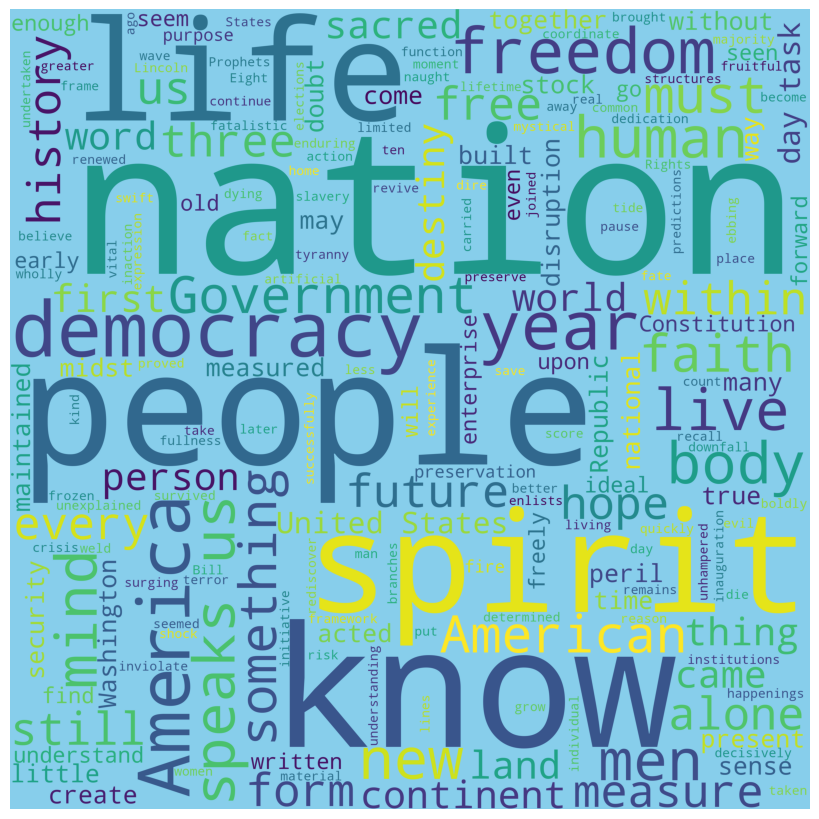

In [340]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='skyblue', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()

# Kennedy speech

In [341]:
corpus2 = Kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
Name: Kennedy, dtype: object

In [342]:
wc_a1 = ' '.join(corpus2)

Word Cloud  (after cleaning)!!


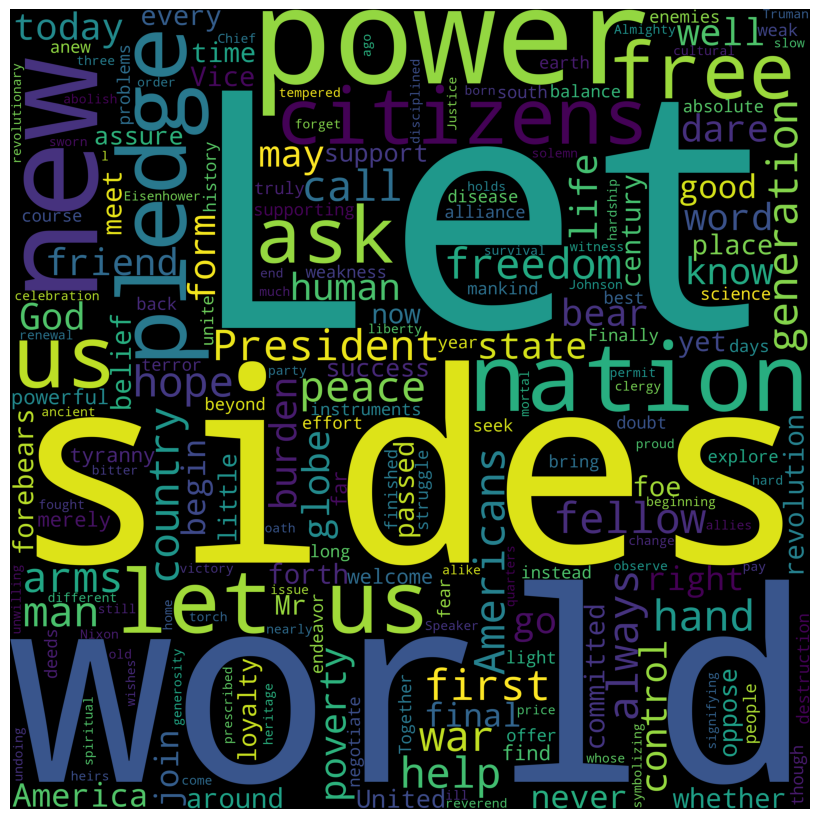

In [343]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()

# Nixon speech

In [344]:
corpus3 = Nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus3

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Nixon, dtype: object

In [345]:
wc_a3 = ' '.join(corpus3)

Word Cloud  (after cleaning)!!


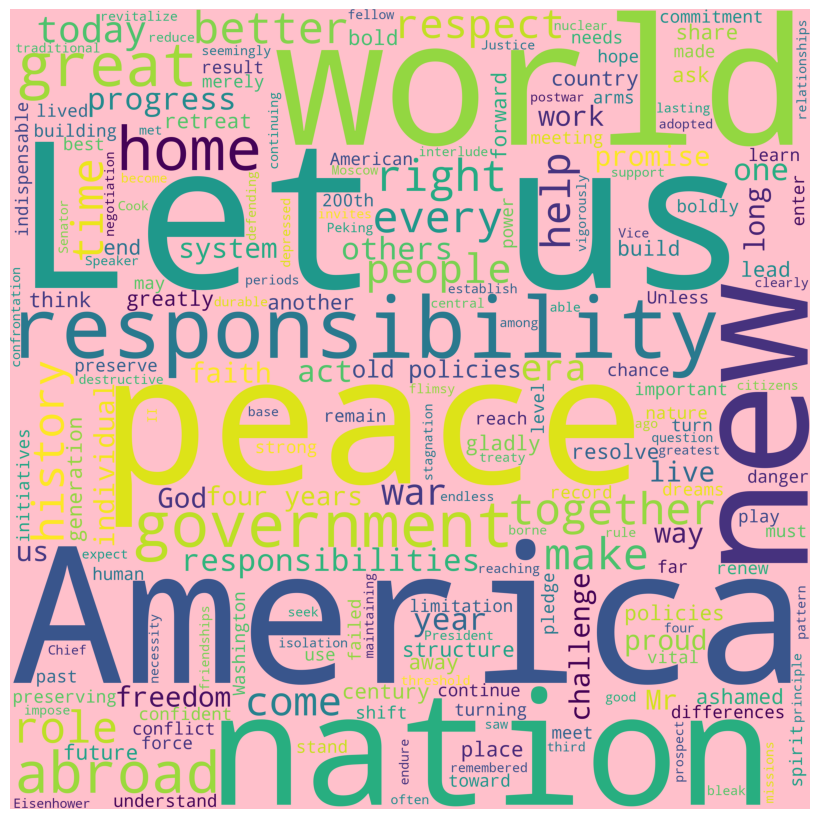

In [346]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='pink', 
                min_font_size = 10, random_state=100).generate(wc_a3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()